<a href="https://colab.research.google.com/github/KatrinaJMD/IronHack_GitHub/blob/main/Cyberbullying_(GoogleColab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Initialization
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

##### settings

In [1]:
# install libraries
!pip install pymysql
!pip install translate
!pip install sqlalchemy

# libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
import scipy.stats as st
import missingno as msno
import re
import math
import collections
from matplotlib import rcParams
from matplotlib import gridspec
from sklearn import linear_model
from IPython.display import display
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from collections import Counter
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
%matplotlib inline

# params
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# pd.set_option("display.max_columns", None)
# # pd.set_option("display.float_format", "{:.2f}".format)
# # pd.options.display.float_format = "{:.2f}".format
# 
# mpl.rcParams["text.color"] = "g"
# plt.style.use("fivethirtyeight")
# 
# params = {"legend.fontsize":"x-large",
#           "figure.figsize":(30, 15),
#           "lines.linewidth":1.5,
#           "axes.labelsize":"x-large",
#           "axes.labelpad":15,
#           "axes.labelweight":"bold",
#           "axes.titlesize":35,
#           "axes.titleweight":"bold",
#           "xtick.labelsize":"x-large",
#           "ytick.labelsize":"x-large"}
# mpl.rcParams.update(params)

# mount drive
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### functions

In [2]:
# most basic info
def getInfo(data):

    # check data info with detailed memory usage, cause why not..
    print("CHECK DATA INFO (WITH DETAILED MEMORY USGAE, CAUSE WHY NOT..)")
    print("-" * 109)
    print(f"{data.info(memory_usage='deep')}\n")
    print(f"{data.memory_usage(deep=True)}")

In [3]:
# more detailed info in one go
def moreInfo(data):
    
    # more data info
    print(f"MORE DATA INFO :")
    print("-" * 109)

    print(f"Data shape : {data.shape}\n")

    # counts no. of rows
    print(f"Total rows in the dataset : {len(data):,}")

    # counts no. of columns
    print(f"Total columns in the dataset : {len(data.columns):,}")

    # counts no. of duplicates
    print(f"Total duplicated values : {str(data.duplicated().sum())}")

    # counts no. of missing values
    print(f"Total null values : {data.isnull().sum().sum():,}")

    # compute missing/duplicates ratio
    print(f"\nRATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :")
    print("-" * 109)

    # ratio for missing values
    isnull_ratio = (data.isnull().sum().sum() / len(data)) * 100

    # ratio for duplicated values
    dup_ratio = (data.duplicated().sum() / len(data)) * 100

    # return results
    print(f"\nPercentage of null values in the data : {round(isnull_ratio, 2)}%")
    print(f"Percentage of duplicates in the data : {round(dup_ratio, 2)}%")
    print("\n")

    # count no. of values per column
    print(f"\nCOUNT VALUES FOR EACH COLUMN :")
    print("-" * 109)
    for column in data.columns:
        countValues = data[column].value_counts(dropna=False).to_frame()
        totalValues = data[column].count()
        print(f"VALUE_COUNTS for column '{column}' : {len(countValues)} rows, {totalValues} values in Total\n")
        display(countValues)
        print("-" * 109)

    # displays no. of missing values per column
    print(f"\nTOTAL MISSING VALUES FOR EACH COLUMN :")
    display(data.isnull().sum().to_frame().rename(columns={0: "MISSING VALUES"}))
    print("\n")

    # displays rows where missing values are found
    print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :")
    display(data[data.isnull().any(axis=1)])
    print("\n")

    # do quick descriptive statistics
    print(f"QUICK DESCRIPTIVE ANALYSIS :")
    print("-" * 109)
    display(data.describe())
    print("\n")

    # categorical statistics
    print(f"NON-NUMERICAL STATISTICS :")
    print("-" * 109)
    display(data.describe(exclude="number"))
    print("\n")

    # view all unique values for each column
    print(f"UNIQUE VALUES FOR EACH COLUMN :")
    print("-" * 109)

    for column in data.columns:
        uniqueValues = data[column].unique()
        uniqueCount = data[column].nunique()
        print(f"UNIQUE VALUES for column '{column}' : {len(uniqueValues)} including NaN values, {uniqueCount} excluding Nan values\n")
        print(f"{uniqueValues}\n")
        print("-" * 109)

In [4]:
# selective call to function
class dataProfiling:

    def moreInfo(self, data):    
        # more data info
        print(f"MORE DATA INFO :")
        print("-" * 109)

        print(f"Data shape : {data.shape}\n")

        # counts no. of rows
        print(f"Total rows in the dataset : {len(data):,}")

        # counts no. of columns
        print(f"Total columns in the dataset : {len(data.columns):,}")

        # counts no. of duplicates
        print(f"Total duplicated values : {str(data.duplicated().sum())}")

        # counts no. of missing values
        print(f"Total null values : {data.isnull().sum().sum():,}")

        # compute missing/duplicates ratio
        print(f"\nRATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :")
        print("-" * 109)

        # ratio for missing values
        isnull_ratio = (data.isnull().sum().sum() / len(data)) * 100

        # ratio for duplicated values
        dup_ratio = (data.duplicated().sum() / len(data)) * 100

        # return results
        print(f"\nPercentage of null values in the data : {round(isnull_ratio, 2)}%")
        print(f"Percentage of duplicates in the data : {round(dup_ratio, 2)}%")
        print("\n")

    def valueCounts(self, data):
        # count no. of values per column
        print(f"\nCOUNT VALUES FOR EACH COLUMN :")
        print("-" * 109)
        for column in data.columns:
            countValues = data[column].value_counts(dropna=False).to_frame()
            totalValues = data[column].count()
            print(f"VALUE_COUNTS for column '{column}' : {len(countValues)} rows, {totalValues} values in Total\n")
            display(countValues)
            print("-" * 109)

    def nullColumn(self, data):
        # displays no. of missing values per column
        print(f"\nTOTAL MISSING VALUES FOR EACH COLUMN :")
        display(data.isnull().sum().to_frame().rename(columns={0: "MISSING VALUES"}))
        print("\n")

    def visualizeNull(self, data):
        # visualize missing values
        print(f"VISAULIZE MISSNG VALUES :")
        print("-" * 109)

        # method 1
        print("METHOD 1")
        sns.heatmap(data.isnull().T,
                    xticklabels=False,
                    cmap="viridis",
                    cbar_kws={"label": "Missing Values"})

        plt.tight_layout()
        plt.show()
        print("\n")

        # method 2
        print("METHOD 2")
        plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
        plt.xlabel("Column Number")
        plt.ylabel("Sample Number");
        print("\n")

    def nullData(self, data):
        # displays rows where missing values are found
        print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :")
        display(data[data.isnull().any(axis=1)])
        print("\n")

    def descriptiveData(self, data):
        # do quick descriptive statistics
        print(f"QUICK DESCRIPTIVE ANALYSIS :")
        print("-" * 109)
        display(data.describe())
        print("\n")

    def nonNumericStats(self, data):
        # categorical statistics
        print(f"NON-NUMERICAL STATISTICS :")
        print("-" * 109)
        display(data.describe(exclude="number"))
        print("\n")

    def uniqueColumn(self, data):
        # view all unique values for each column
        print(f"UNIQUE VALUES FOR EACH COLUMN :")
        print("-" * 109)

        for column in data.columns:
            uniqueValues = data[column].unique()
            uniqueCount = data[column].nunique()
            print(f"UNIQUE VALUES for column '{column}' : {len(uniqueValues)} including NaN values, {uniqueCount} excluding Nan values\n")
            print(f"{uniqueValues}\n")
            print("-" * 109)

# instance of the dataProfiling class
profiler = dataProfiling()

##### Loading dataset

In [5]:
data = pd.read_excel("/content/drive/MyDrive/[01] Data Analytics - IronHack/[06] Courses/Week 3/Day 15 - Friday/Project No.3/1 - cyberbullying_in_social_media.xlsx")
dataBackup = data.copy()

### Data Profiling (*exploration*)

#### Basic data info

In [6]:
data.head()

,Id,Text,IsRetweet,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,SenderLocation,Emojis#,Punctuations#,UpperCaseLetter#,Letter#,Symbols#,Words#,TWords#,UWords#,SlangWords#,AvgWordLength,IsCyberbullying
0,1123850514356232192,bir adam yanÄ±nda Ã§ocuklaÅŸan kadÄ±nÄ± fazlad...,0.00,0.00,59.00,1045,1,0,0,1935601099,2020,0,0,0.00,0,NaN,0.00,9,5,144,0,23,5,0,0,6.00,False
1,1161962510918045696,maÄŸlup mu desem mahcup mu ama ikisi de deÄŸil...,0.00,0.00,3.00,157,1,0,0,1935601099,2020,0,0,0.00,0,na,0.00,8,8,147,0,31,8,0,1,4.00,False
2,1162604714976002048,gÃ¼naydÄ±n iyi pazarlar allah acil ÅŸifalar ve...,0.00,0.00,1.00,3,0,0,11,927613872390975488,2020,0,0,0.00,0,NaN,3.00,0,2,64,2,12,2,0,0,5.00,False
3,1163015921205764096,ve ahmet arif leyla sÄ±na seslenir sevdiÄŸim Ã...,0.00,0.00,13.00,220,2,0,0,1935601099,2020,0,0,0.00,0,na,0.00,19,16,150,0,23,14,0,0,6.00,False
4,1157727895562985472,arkadaki sanal gerzek oyunun oynuyor,0.00,0.00,950.00,12104,0,1,0,4495931,12,22554,32766,60281.00,25482,turkey,0.00,0,1,35,0,5,1,0,1,7.00,False


In [7]:
getInfo(data)

CHECK DATA INFO (WITH DETAILED MEMORY USGAE, CAUSE WHY NOT..)
-------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  5000 non-null   int64  
 1   Text                5000 non-null   object 
 2   IsRetweet           4995 non-null   float64
 3   IsSelfMentioned     4994 non-null   float64
 4   Retweets#           4967 non-null   float64
 5   Favorites#          5000 non-null   int64  
 6   Hashtags#           5000 non-null   int64  
 7   Medias#             5000 non-null   int64  
 8   Mentions#           5000 non-null   int64  
 9   SenderId            5000 non-null   int64  
 10  SenderAccountYears  5000 non-null   int64  
 11  SenderFavorites#    5000 non-null   int64  
 12  SenderFollowings#   5000 non-n

In [8]:
moreInfo(data)

MORE DATA INFO :
-------------------------------------------------------------------------------------------------------------
Data shape : (5000, 27)

Total rows in the dataset : 5,000
Total columns in the dataset : 27
Total duplicated values : 0
Total null values : 589

RATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :
-------------------------------------------------------------------------------------------------------------

Percentage of null values in the data : 11.78%
Percentage of duplicates in the data : 0.0%



COUNT VALUES FOR EACH COLUMN :
-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Id' : 5000 rows, 5000 values in Total



,Id
1123850514356232192,1
1158480097873203200,1
1158578247770263552,1
1158540408206573568,1
1158529130893385728,1
...,...
1158891563436711936,1
1158891551227088896,1
1158863043406815232,1
1158846258183921664,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Text' : 4962 rows, 5000 values in Total



,Text
merhaba ben kayseri den travesti hasret sevda gÃ¶rÃ¼ÅŸmeleri mi kendime ait evimde yapÄ±yorum ne aradÄ±gÄ±nÄ± biliyorsan ve ciddiysen eÄŸer gÃ¶rÃ¼ÅŸelim mÃ¼saitim ÅŸuan 0541 691 29 19 bayan degilim 0541 691 29 19,5
piÃ§ herif,3
neÅŸet ertaÅŸ elini kalbine gÃ¶tÃ¼rdÃ¼ burasÄ± varya dedi taÅŸa topraÄŸa gerzek kalmadan insanÄ±n gÃ¶mÃ¼ldÃ¼ÄŸÃ¼ tek yer,3
hoÅŸt,3
bursatravesti sÄ±nÄ±rsÄ±z oldu bitti yok bursa altÄ±parmak travesti afra 05366906903,3
...,...
acÄ±klandÄ± kÃ¶r olaydÄ±mda gÃ¶rmeyeydim aq,1
biz sana orospu ol dedik gavat deÄŸil,1
bayÄ±lÄ±yorum bÃ¶yle videolara aq keÅŸke yÃ¼kselseydi de yangÄ±n sÃ¶ndÃ¼rme tÃ¼pÃ¼yle dÃ¶vseydi reis aÃ¶dlalflslfl,1
misafir odasÄ± gibisin Ã¶zenilmiÅŸ bezenilmiÅŸsin ama bir boka yaramazsÄ±n,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'IsRetweet' : 2 rows, 4995 values in Total



,IsRetweet
0.00,4995
NaN,5


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'IsSelfMentioned' : 3 rows, 4994 values in Total



,IsSelfMentioned
0.00,4990
NaN,6
1.00,4


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Retweets#' : 472 rows, 4967 values in Total



,Retweets#
0.00,2862
1.00,412
2.00,149
3.00,103
4.00,65
...,...
492.00,1
3442.00,1
101.00,1
1876.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Favorites#' : 884 rows, 5000 values in Total



,Favorites#
0,2457
1,382
2,126
3,94
4,67
...,...
1352,1
3318,1
46345,1
1326,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Hashtags#' : 18 rows, 5000 values in Total



,Hashtags#
0,4426
1,399
2,95
3,42
4,11
5,8
7,4
6,3
9,2
18,2


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Medias#' : 5 rows, 5000 values in Total



,Medias#
0,3920
1,901
2,88
4,67
3,24


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Mentions#' : 23 rows, 5000 values in Total



,Mentions#
0,3244
1,1294
2,286
3,102
4,27
5,12
6,9
10,4
8,4
7,3


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'SenderId' : 4277 rows, 5000 values in Total



,SenderId
4604138494,26
1094858148207316992,22
1009881453293948928,15
23186079,14
423805915,10
...,...
2744347044,1
2377019991,1
2564938892,1
2319696956,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'SenderAccountYears' : 15 rows, 5000 values in Total



,SenderAccountYears
0,1201
1,790
2,493
8,374
3,366
6,361
7,357
4,329
5,283
9,250


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'SenderFavorites#' : 3356 rows, 5000 values in Total



,SenderFavorites#
0,175
1,34
2,33
4,29
357,28
...,...
20949,1
14190,1
408,1
964,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'SenderFollowings#' : 1659 rows, 5000 values in Total



,SenderFollowings#
0,130
12,100
149,29
2,28
95,26
...,...
1469,1
13731,1
805,1
393,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'SenderFollowers#' : 2263 rows, 4995 values in Total



,SenderFollowers#
0.00,132
1.00,29
640701.00,26
360.00,25
46.00,25
...,...
3753.00,1
2102.00,1
379.00,1
1522.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'SenderStatues#' : 3004 rows, 5000 values in Total



,SenderStatues#
1,42
1916,26
2,23
2341,22
13,18
...,...
2652,1
11435,1
4518,1
2199,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'SenderLocation' : 427 rows, 4636 values in Total



,SenderLocation
tÃ¼rkiye,798
ankara,613
istanbul,374
NaN,364
bursa,226
...,...
eryamanankara,1
bayrampaÅŸa,1
tÃ¼rkiyeadana,1
velaris,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Emojis#' : 22 rows, 4994 values in Total



,Emojis#
0.00,4286
1.00,315
2.00,145
3.00,100
4.00,61
6.00,23
5.00,15
9.00,9
12.00,8
8.00,7


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Punctuations#' : 37 rows, 5000 values in Total



,Punctuations#
0,1954
1,765
2,546
3,428
4,334
5,231
6,184
7,149
8,108
9,77


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'UpperCaseLetter#' : 80 rows, 5000 values in Total



,UpperCaseLetter#
1,2062
0,668
2,587
3,305
4,269
...,...
120,1
70,1
239,1
69,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Letter#' : 244 rows, 5000 values in Total



,Letter#
36,69
43,63
25,59
27,58
34,56
...,...
245,1
242,1
247,1
249,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Symbols#' : 8 rows, 5000 values in Total



,Symbols#
0,4771
1,136
2,55
4,18
3,9
5,4
6,4
8,3


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Words#' : 48 rows, 5000 values in Total



,Words#
6,354
5,334
7,292
4,291
8,274
9,271
10,240
3,238
11,215
12,191


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'TWords#' : 35 rows, 5000 values in Total



,TWords#
1,2103
0,675
2,672
3,388
4,291
5,207
6,145
7,108
8,86
9,84


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'UWords#' : 26 rows, 5000 values in Total



,UWords#
0,4394
1,325
2,100
3,49
4,36
6,20
5,16
8,16
7,14
10,4


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'SlangWords#' : 8 rows, 5000 values in Total



,SlangWords#
0,2206
1,2042
2,531
3,126
4,65
5,20
6,8
7,2


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'AvgWordLength' : 18 rows, 4830 values in Total



,AvgWordLength
5.00,1817
6.00,1403
4.00,683
7.00,510
8.00,176
NaN,170
3.00,117
9.00,58
10.00,22
11.00,15


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'IsCyberbullying' : 2 rows, 5000 values in Total



,IsCyberbullying
False,2500
True,2500


-------------------------------------------------------------------------------------------------------------

TOTAL MISSING VALUES FOR EACH COLUMN :


,MISSING VALUES
Id,0
Text,0
IsRetweet,5
IsSelfMentioned,6
Retweets#,33
Favorites#,0
Hashtags#,0
Medias#,0
Mentions#,0
SenderId,0




DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :


,Id,Text,IsRetweet,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,SenderLocation,Emojis#,Punctuations#,UpperCaseLetter#,Letter#,Symbols#,Words#,TWords#,UWords#,SlangWords#,AvgWordLength,IsCyberbullying
0,1123850514356232192,bir adam yanÄ±nda Ã§ocuklaÅŸan kadÄ±nÄ± fazlad...,0.00,0.00,59.00,1045,1,0,0,1935601099,2020,0,0,0.00,0,NaN,0.00,9,5,144,0,23,5,0,0,6.00,False
2,1162604714976002048,gÃ¼naydÄ±n iyi pazarlar allah acil ÅŸifalar ve...,0.00,0.00,1.00,3,0,0,11,927613872390975488,2020,0,0,0.00,0,NaN,3.00,0,2,64,2,12,2,0,0,5.00,False
5,1158389499656843264,ikea dolap montajÄ±nda zorlanacaÄŸÄ±na eminim,0.00,0.00,NaN,0,0,0,1,3696241,12,1047,457,334.00,1853,istanbul,0.00,1,1,38,0,5,1,0,0,7.00,False
8,1158683948517613568,bu Ã§ocuÄŸu hala nasÄ±l takip edebiliyorsunuz ...,0.00,0.00,NaN,0,0,0,1,15883237,11,14343,898,1985.00,2389,ankara,0.00,0,0,67,0,10,0,0,1,6.00,True
87,1158244072672452608,istanbul da ÅŸÃ¶hreti yakalayan ÅŸaban kemalsu...,0.00,0.00,NaN,35,2,1,0,74397391,10,520,61,1614911.00,89970,istanbul,0.00,13,7,84,0,17,5,0,0,4.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,1207296237218795520,sen verme ak akÅŸam akÅŸam iti kopuÄŸu puÅŸt k...,0.00,0.00,0.00,1,0,0,1,1206999834693193728,0,30,24,14.00,35,NaN,0.00,1,2,58,0,12,2,0,2,4.00,True
4993,1207297053073784832,sizinki iman falan da degil basbayaÄŸÄ± orospu...,0.00,0.00,0.00,0,0,0,2,1119675760439123968,0,83,63,2.00,579,NaN,0.00,1,2,72,0,12,2,0,1,6.00,True
4994,1207298573525831680,fahiÅŸe olmuÅŸ ruhlarÄ±n vesikayla ispatÄ± yok...,0.00,0.00,0.00,1,0,0,2,1121491581595467776,0,17176,430,251.00,5907,NaN,0.00,1,2,79,0,12,2,0,1,6.00,True
4997,1207301094285697024,bu ÅŸerefsiz i biraz aÃ§mak iÃ§in seÃ§ildiÄŸin...,0.00,0.00,0.00,0,0,0,2,1201558539472379904,0,11,5,0.00,104,NaN,0.00,7,5,232,0,36,5,0,0,6.00,True




QUICK DESCRIPTIVE ANALYSIS :
-------------------------------------------------------------------------------------------------------------


,Id,IsRetweet,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Punctuations#,UpperCaseLetter#,Letter#,Symbols#,Words#,TWords#,UWords#,SlangWords#,AvgWordLength
count,5000.00,4995.00,4994.00,4967.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,4995.00,5000.00,4994.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,4830.00
mean,1149112605501803648.00,0.00,0.00,132.10,733.08,0.20,0.28,0.56,562601373952640320.00,5.34,20832.55,6714.93,109699.40,10745.44,0.40,2.53,4.27,83.17,0.08,14.07,2.69,0.35,0.78,5.54
std,83702787064376656.00,0.00,0.03,1078.05,4955.51,0.93,0.65,1.65,514066531329283712.00,59.56,53253.04,65110.99,836945.19,38135.95,1.68,4.03,10.68,62.53,0.47,10.47,3.64,1.75,0.91,1.46
min,1292782403.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3696241.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,1158139717623413760.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1208505124.50,1.00,575.25,97.00,123.50,394.00,0.00,0.00,1.00,35.00,0.00,6.00,1.00,0.00,0.00,5.00
50%,1159270907562631168.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,802846613530134528.00,3.00,3871.00,297.00,616.00,1978.00,0.00,1.00,1.00,63.00,0.00,11.00,1.00,0.00,1.00,5.00
75%,1162006426623073280.00,0.00,0.00,7.00,44.00,0.00,0.00,1.00,1067078972385751040.00,6.00,16760.25,955.00,4881.00,7052.00,0.00,4.00,4.00,116.00,0.00,20.00,3.00,0.00,1.00,6.00
max,1207301698441678848.00,0.00,1.00,29086.00,163984.00,23.00,4.00,50.00,1207067359342710784.00,2020.00,814597.00,1658816.00,13974880.00,986428.00,55.00,84.00,239.00,249.00,8.00,49.00,40.00,40.00,7.00,53.00




NON-NUMERICAL STATISTICS :
-------------------------------------------------------------------------------------------------------------


,Text,SenderLocation,IsCyberbullying
count,5000,4636,5000
unique,4962,426,2
top,merhaba ben kayseri den travesti hasret sevda ...,tÃ¼rkiye,False
freq,5,798,2500




UNIQUE VALUES FOR EACH COLUMN :
-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'Id' : 5000 including NaN values, 5000 excluding Nan values

[1123850514356232192 1161962510918045696 1162604714976002048 ...
 1207301094285697024 1207301541293633536 1207301698441678848]

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'Text' : 4962 including NaN values, 4962 excluding Nan values

['bir adam yanÄ±nda Ã§ocuklaÅŸan kadÄ±nÄ± fazladan sevmeli Ã§Ã¼nkÃ¼ bu yalnÄ±zken hep gÃ¼Ã§lÃ¼ gÃ¶rÃ¼ndÃ¼m izninle huzur bulduÄŸum yerde biraz ÅŸÄ±marmak istiyorum deme ÅŸeklidir perÅŸembe'
 'maÄŸlup mu desem mahcup mu ama ikisi de deÄŸil ben garip sen gÃ¼zel dÃ¼nya umutlu Ã¶yle bir tuhafÄ±m bu akÅŸamÃ¼stÃ¼ sevgilim canavar gÃ¶tÃ¼nÃ¼ gibi iki yanÄ±m iki sÃ¼ngÃ¼ ahmed arif perÅŸembe'
 'gÃ¼naydÄ±n iyi pazarlar allah acil ÅŸifalar versin inÅŸa

#### Exploration methods

##### NaN values

VISAULIZE MISSNG VALUES :
-------------------------------------------------------------------------------------------------------------
METHOD 1


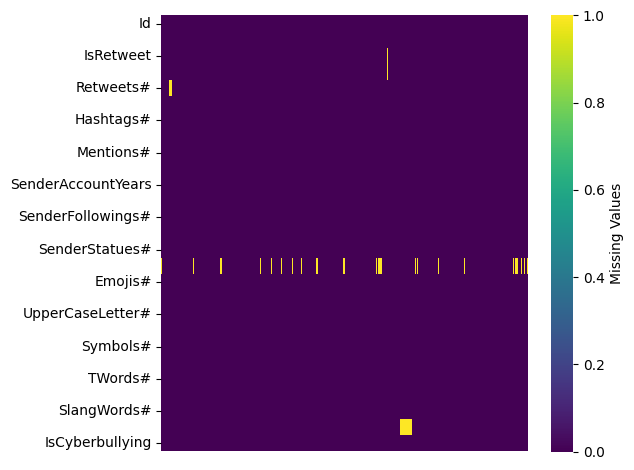



METHOD 2




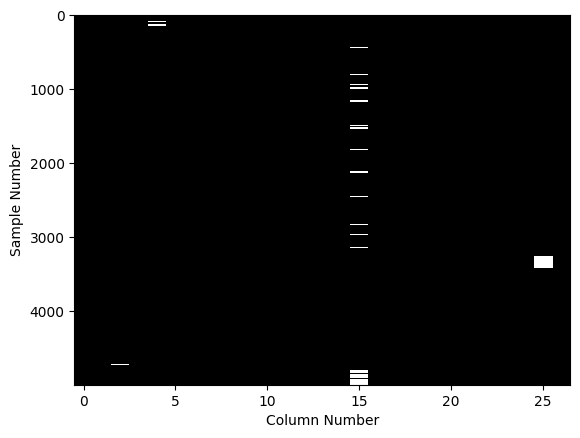

In [9]:
profiler.visualizeNull(data)

<Axes: title={'center': 'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

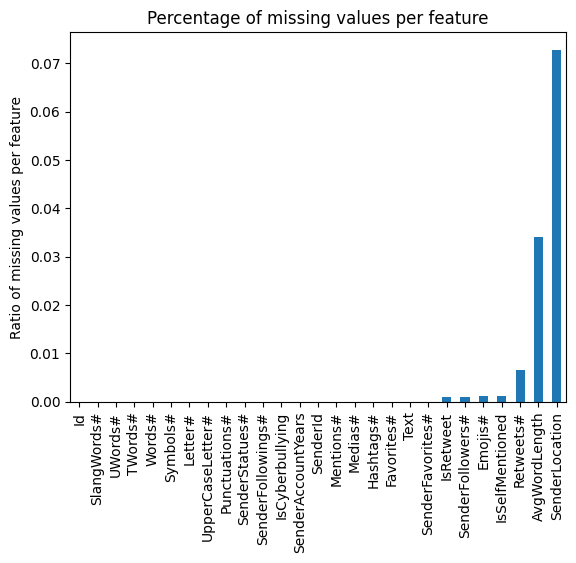

In [10]:
# method 3
data.isna().mean().sort_values().plot(kind="bar", title="Percentage of missing values per feature", ylabel="Ratio of missing values per feature")

<Axes: >

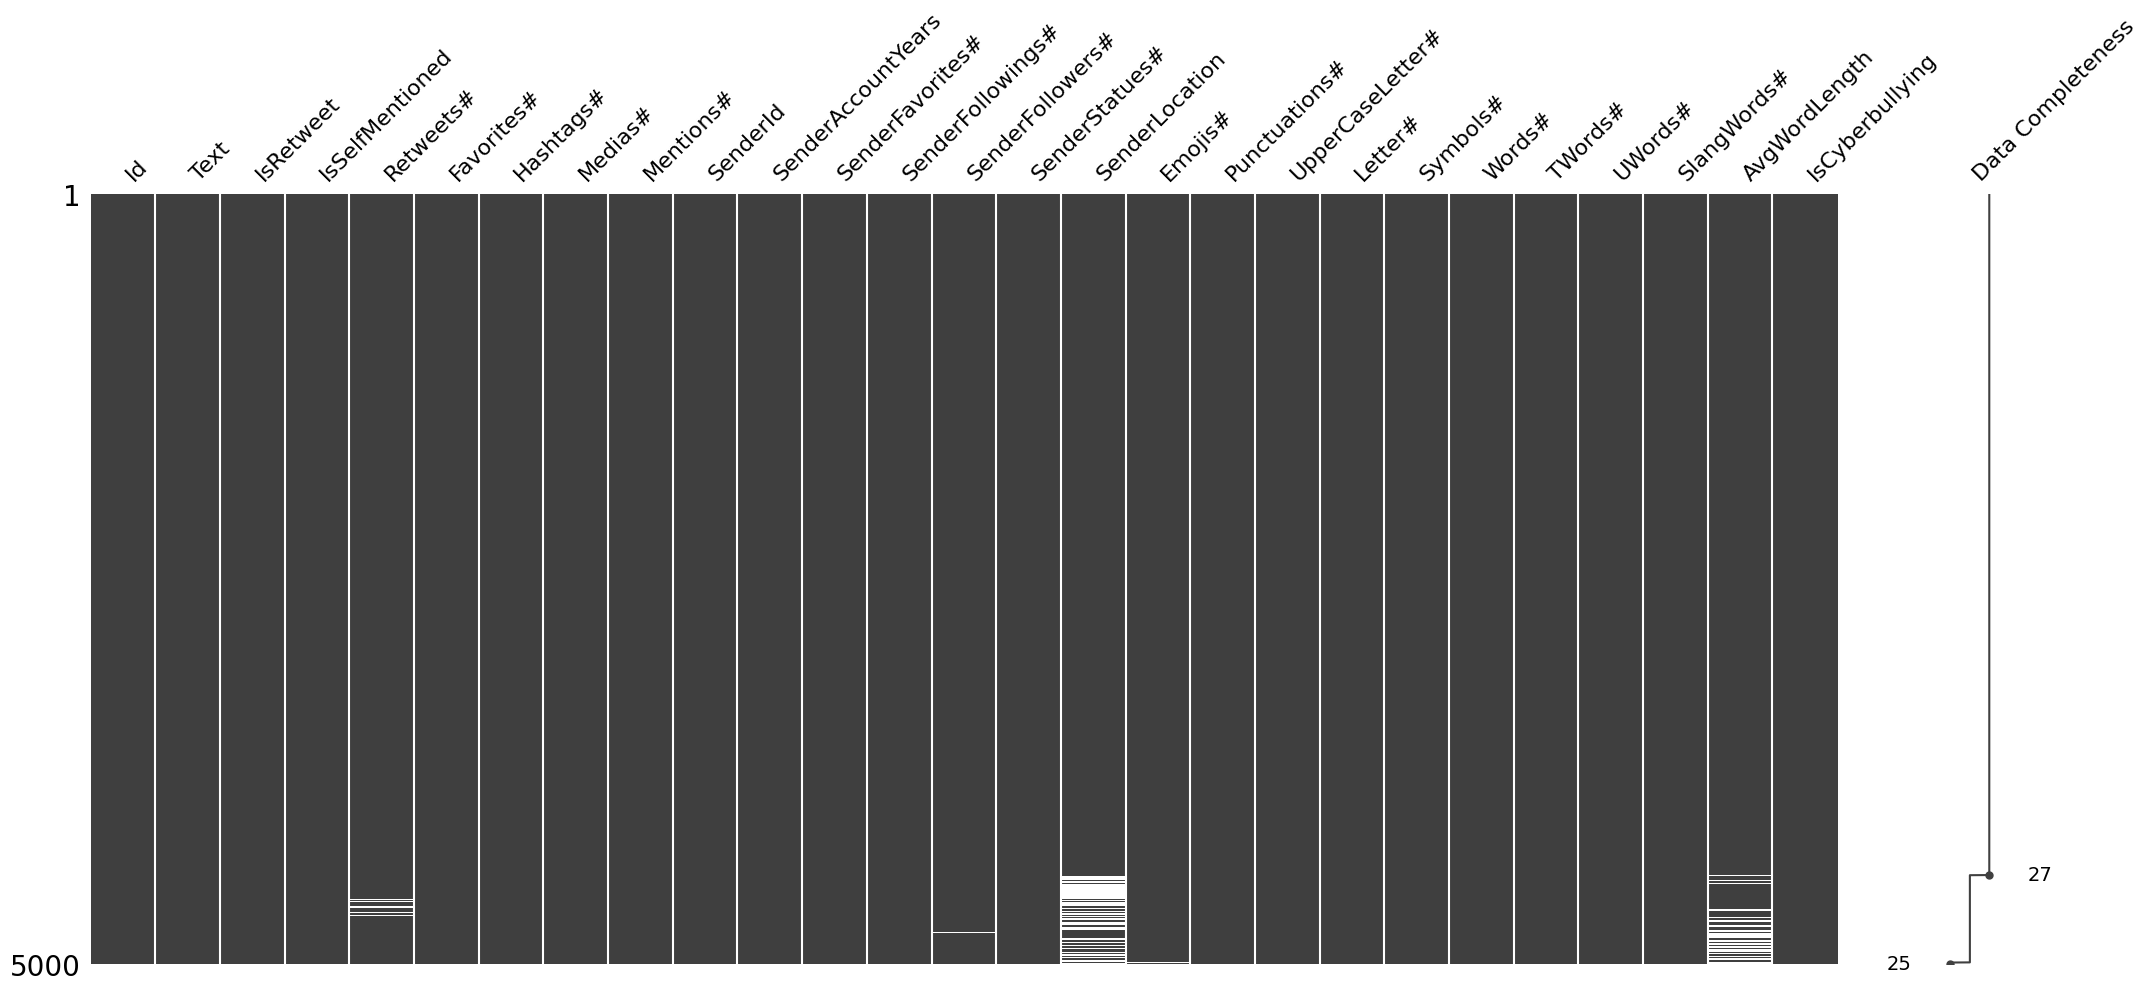

In [11]:
# method 4
msno.matrix(data, labels=True, sort="descending")

<Axes: >

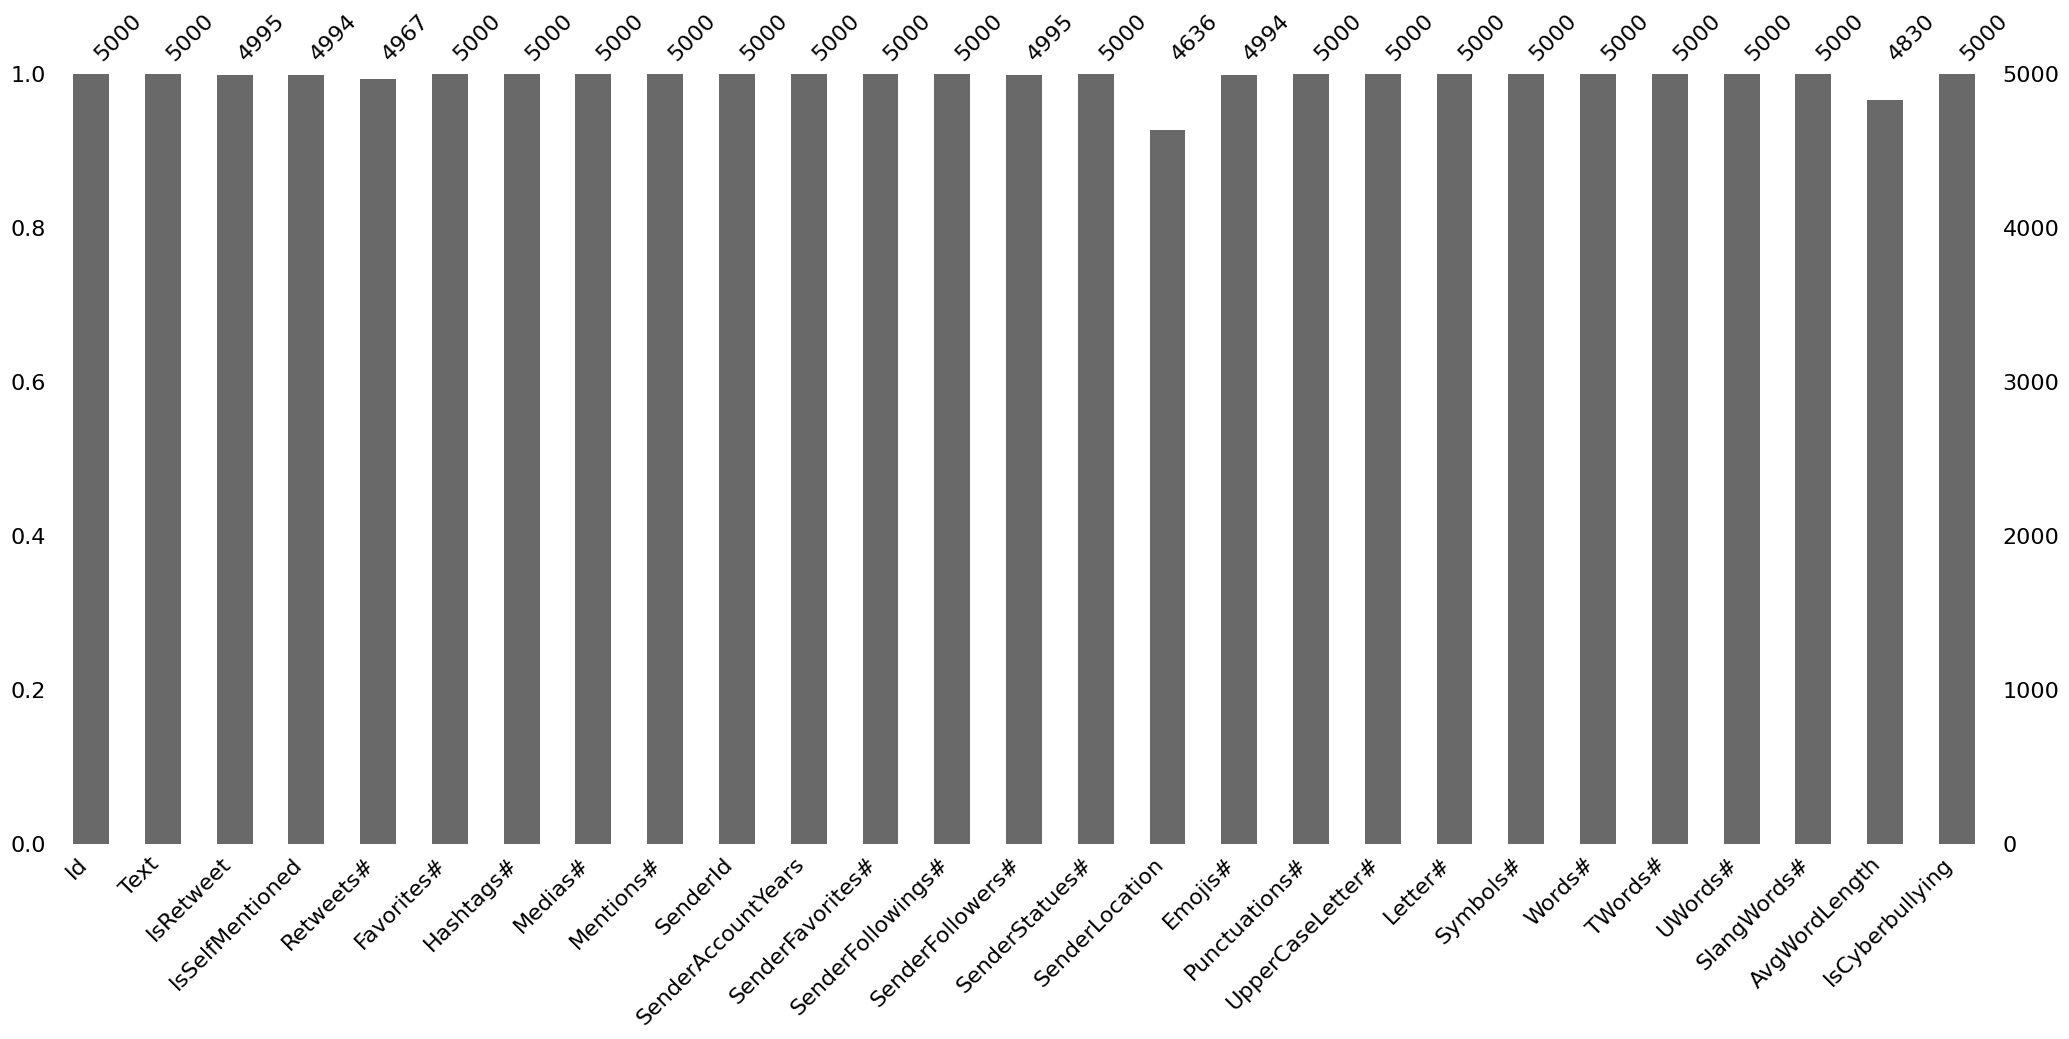

In [12]:
# method 5
msno.bar(data)

##### Non-numeric stats

In [13]:
profiler.nonNumericStats(data)

NON-NUMERICAL STATISTICS :
-------------------------------------------------------------------------------------------------------------


,Text,SenderLocation,IsCyberbullying
count,5000,4636,5000
unique,4962,426,2
top,merhaba ben kayseri den travesti hasret sevda ...,tÃ¼rkiye,False
freq,5,798,2500


##### Unique entries per feature

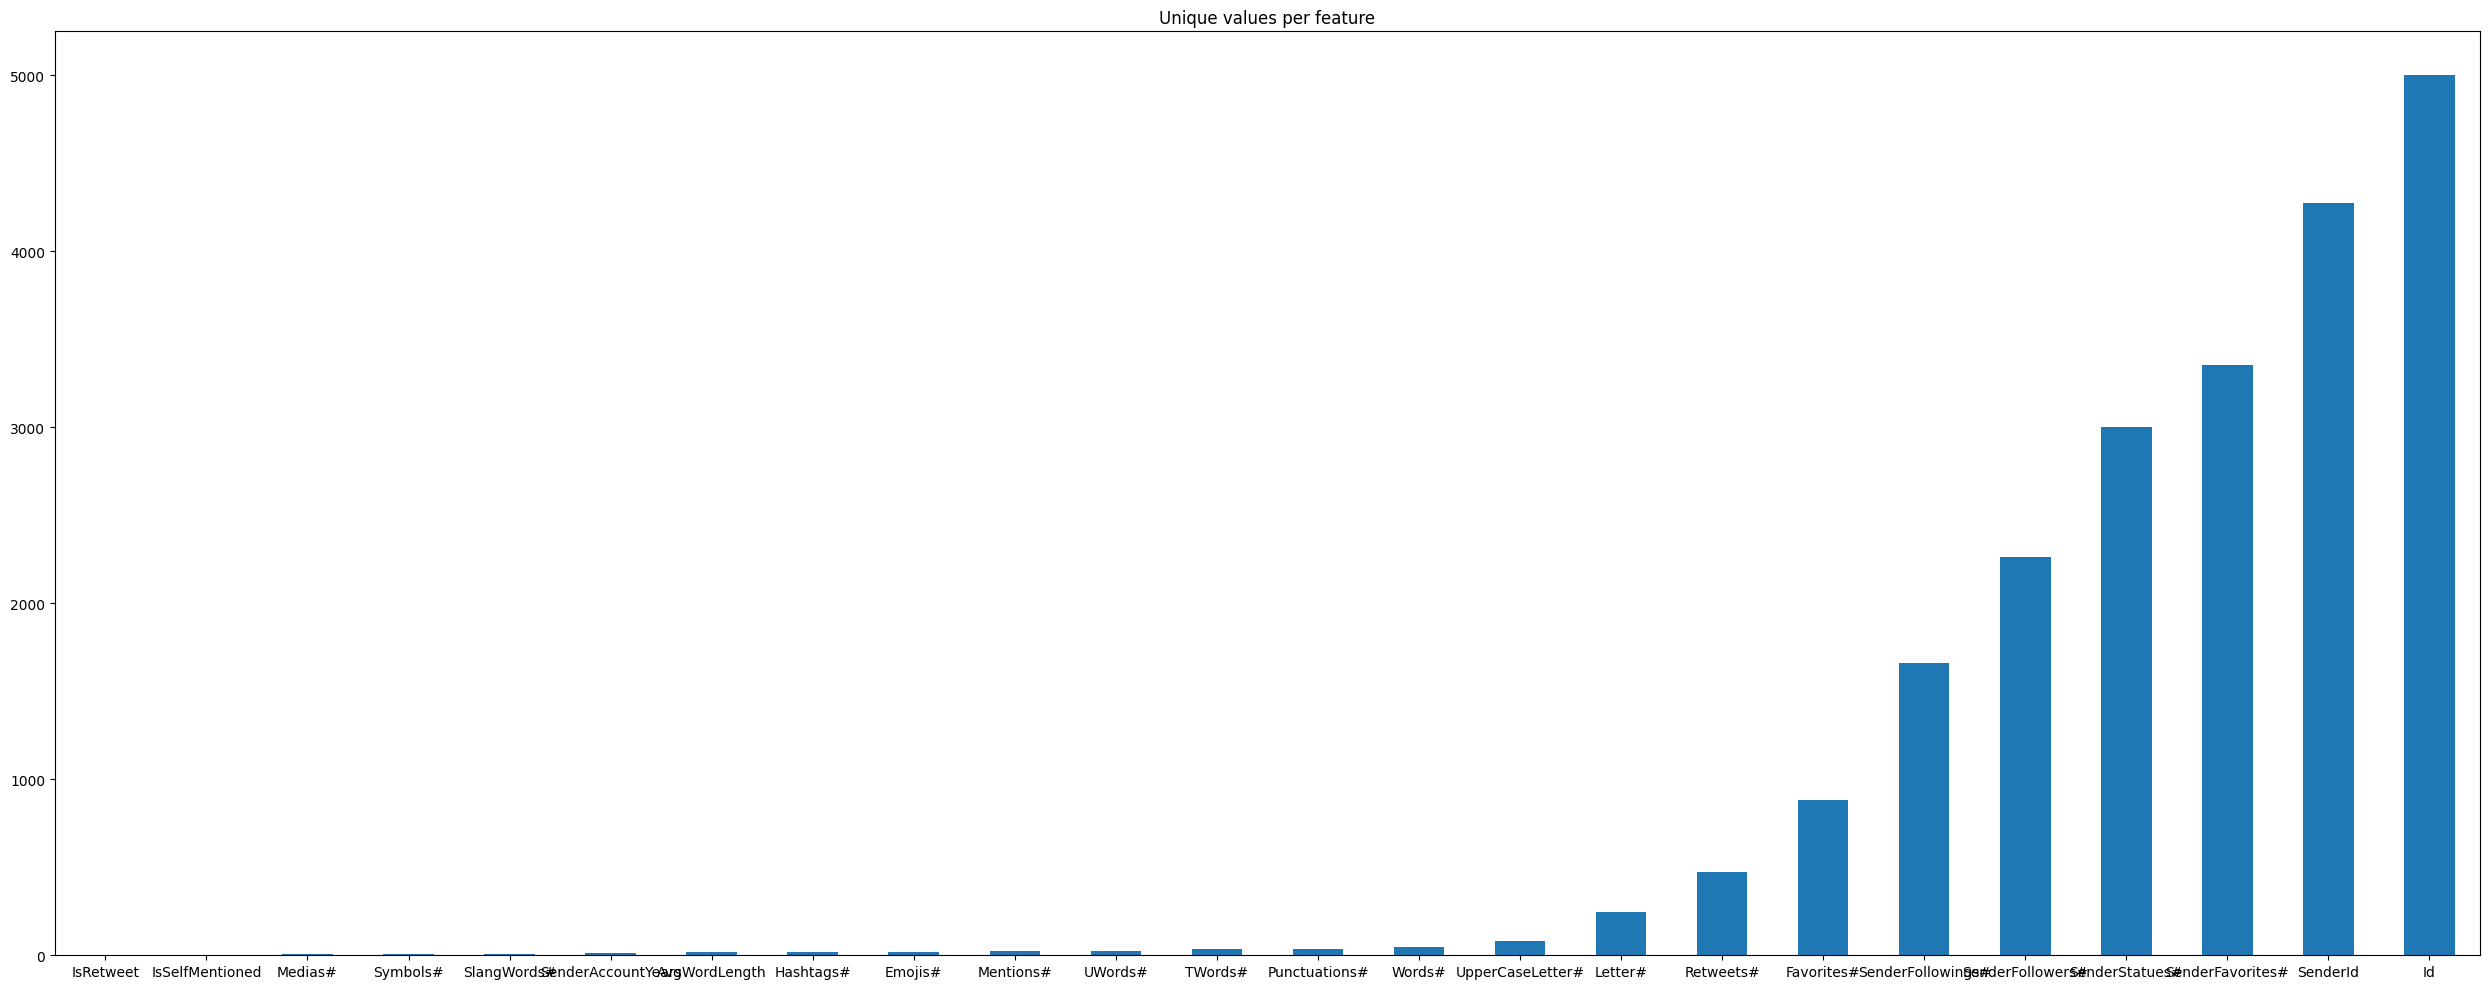

In [14]:
# for each numerical feature compute number of unique entries
unique_values = data.select_dtypes(include="number").nunique().sort_values()

# plot information with y-axis in log-scale
unique_values.plot.bar(logy=False, title="Unique values per feature", figsize=(25,10))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### **WHAT WE KNOW SO FAR :**

1. **FILE INFO**
    - Data shape : (5000, 27)
    - Total rows in the dataset : 5,000
    - Total columns in the dataset : 27
    - Total duplicated values : 0
    - Total null values : 589 or 11.78% of the data

2. **COLUMN INFO**
    - No. of unique values and no. of total values per column :
        - **`Id`** : 5 000 unique -- (5 000 total)
        - **`Text`** : 4 962 unique -- (5 000 total)
        - **`IsRetweet`** : 2 unique -- (4 995 total)
        - **`IsSelfMentioned`** : 3 unique -- (4 994 total)
        - **`Retweets#`** : 472 unique -- (4 967 total)
        - **`Favorites#`** : 884 unique -- (5 000 total)
        - **`Hashtags#`** : 18 unique -- (5 000 total)
        - **`Medias#`** : 5 unique -- (5 000 total)
        - **`Mentions#`** : 23 unique -- (5 000 total)
        - **`SenderId`** : 4 277 unique -- (5 000 total)
        - **`SenderAccountYears`** : 15 unique -- (5 000 total)
        - **`SenderFavorites#`** : 3 356 unique -- (5 000 total)
        - **`SenderFollowings#`** : 1 659 unique -- (5 000 total)
        - **`SenderFollowers#`** : 2 263 unique -- (4 995 total)
        - **`SenderStatues#`** : 3 004 unique -- (5 000 total)
        - **`SenderLocation`** : 427 unique -- (4 636 total)
        - **`Emojis#`** : 27 unique -- (4 994 total)
        - **`Punctuations#`** : 37 unique -- (5 000 total)
        - **`UpperCaseLetter#`** : 80 (5 000 total)
        - **`Letter#`** : 244 unique -- (5 000 total)
        - **`Symbols#`** : 8 unique -- (5 000 total)
        - **`Words#`** : 48 unique -- (5 000 total)
        - **`TWords#`** : 35 unique -- (5 000 total)
        - **`UWords#`** : 26 unique -- (5 000 total)
        - **`SlangWords#`** : 8 unique -- (5 000 total)
        - **`AvgWordLength`** : 18 unique -- (4 830 total)
        - **`IsCyberbullying`** : 2 unique -- (5 000 total)

    - Columns with null values (and no. of missing values) :
        - **`IsRetweet`** (5)
        - **`IsSelfMentioned`** (6)
        - **`Retweets#`** (33)
        - **`SenderFollowers#`** (5)
        - **`SenderLocation`** (364)
        - **`Emojis#`** (6)
        - **`AVgWordLength`** (170)

#### **WHAT ARE WE PLANNING TO DO ABOUT IT :**

1. Make a back-up
    - **`dataBackup`** : to view original data for comparison purposes
    > ***REASON*** : Because we're efficiently ***awesome***, not ~lazy~. It's really to prevent scrolling all the way up and re-running~ the cell to load the original file


2. Drop redundant columns
    - **`Id`** : we'll use index instead
    - **`Text`** : written in Turkish with special characters. No time to import proper libraries and analyse
    - **`IsRetweet`** : all values are either 0 or Nan
    - **`Punctuations#`** : no time for Sentiment Analysis
    - **`UpperCaseLetter#`** : same reason as above
    - **`SenderLocation`** : mostly written in Turkish with special characters Hard to identify locations with a limited time
    - **`Symbols#`** : don't feel the necessity to keep for the purpose of this project
    - **`TWords#`** : same as above
    - **`UWords#`** : same as above
> ***NOTE*** : Redundant in this case doesn't really mean they're useless for analysis. They absolutely are when it comes to *Sentiment Analysis*. But for this project, and taking into account time contraints, we will only be focusing on data validation (*cleaning*) and only keep necesary columns for basic descriptive analysis and SQL queries.

3. Imputing missing values
> There are few approaches for this case :
    - **a.** If **all values** are **exclusively** cyber bullies or non cyber bullies : <br>
    then use **median** or **mode** of the group <br><br>
    - **b.** If **none is True** above and is **numeric** values : <br> then global **mean** (_if no outliers_) <br>
    else, identify outliers using the **1.5 x IQR rule*** then calculate **median** or **mode** without outliers<br><br>
    - **c.** If **non-numeric** values :
    <br> then **median** or **mode** <br> else **Unknown**

4. Change data types (_`float64` to `int64`_)
    - **`IsSelfMentioned`** : can't be a decimal number (*and for viewing purposes*)
    - **`Retweets#`** : same as above
    - **`SenderFollowers#`** : same as above
    - **`Emojis#`** : same as above

---
**THE 1.5 x IQR RULE**

1. calculate IQR :
    - IQR = Q3 - Q1
2. calculate lower and higher extremes
    - Lower outlier = Q1 - (1.5 * IQR)
    - Higher outlier = Q3 + (1.5 * IQR)

### Data Validation Process (*cleaning*)

#### **RECALL METHODS :**

```python
# use these methods to analyze the data
profiler.moreInfo(data)
profiler.valueCounts(data)
profiler.nullColumn(data)
profiler.visualizeNull(data)
profiler.nullData(data)
profiler.descriptiveData(data)
profiler.nonNumericStats(data)
profiler.uniqueColumn(data)
```

#### Drop redundant columns

In [15]:
# list of columns to drop
to_drop = ["Id", "Text", "IsRetweet", "Punctuations#", "UpperCaseLetter#", "SenderLocation", "Symbols#", "TWords#", "UWords#"]

# time to drop it like it's hot
data.drop(columns=to_drop, inplace=True)

# verify results
print(f"No. of columns left : from {len(dataBackup.columns)} down to {len(data.columns)}")
print("-" * 109)
print("\nBEFORE")
display(list(dataBackup.columns))
print("-" * 109)
print("\nAFTER")
display(list(data.columns))

No. of columns left : from 27 down to 18
-------------------------------------------------------------------------------------------------------------

BEFORE


['Id',
 'Text',
 'IsRetweet',
 'IsSelfMentioned',
 'Retweets#',
 'Favorites#',
 'Hashtags#',
 'Medias#',
 'Mentions#',
 'SenderId',
 'SenderAccountYears',
 'SenderFavorites#',
 'SenderFollowings#',
 'SenderFollowers#',
 'SenderStatues#',
 'SenderLocation',
 'Emojis#',
 'Punctuations#',
 'UpperCaseLetter#',
 'Letter#',
 'Symbols#',
 'Words#',
 'TWords#',
 'UWords#',
 'SlangWords#',
 'AvgWordLength',
 'IsCyberbullying']

-------------------------------------------------------------------------------------------------------------

AFTER


['IsSelfMentioned',
 'Retweets#',
 'Favorites#',
 'Hashtags#',
 'Medias#',
 'Mentions#',
 'SenderId',
 'SenderAccountYears',
 'SenderFavorites#',
 'SenderFollowings#',
 'SenderFollowers#',
 'SenderStatues#',
 'Emojis#',
 'Letter#',
 'Words#',
 'SlangWords#',
 'AvgWordLength',
 'IsCyberbullying']

In [16]:
# view then data
print("BEFORE")
profiler.moreInfo(dataBackup)

BEFORE
MORE DATA INFO :
-------------------------------------------------------------------------------------------------------------
Data shape : (5000, 27)

Total rows in the dataset : 5,000
Total columns in the dataset : 27
Total duplicated values : 0
Total null values : 589

RATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :
-------------------------------------------------------------------------------------------------------------

Percentage of null values in the data : 11.78%
Percentage of duplicates in the data : 0.0%




In [17]:
# view now data
print("AFTER")
profiler.moreInfo(data)

AFTER
MORE DATA INFO :
-------------------------------------------------------------------------------------------------------------
Data shape : (5000, 18)

Total rows in the dataset : 5,000
Total columns in the dataset : 18
Total duplicated values : 7
Total null values : 220

RATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :
-------------------------------------------------------------------------------------------------------------

Percentage of null values in the data : 4.4%
Percentage of duplicates in the data : 0.14%




- We have 19 columns remaining out of the original 27
- The number of null values decreased from 589 to 220, a difference of 369
- Thus, the proportion of missing values in the data has reduced from 11.78% to 4.4%

#### Impute missing values

##### **IsSelfMentioned** Column

In [18]:
# count NaN values
data["IsSelfMentioned"].isnull().sum()

6

In [19]:
# recall unique values
data.IsSelfMentioned.unique()

array([ 0., nan,  1.])

In [20]:
# isolate all NaN values and investigate
data[data["IsSelfMentioned"].isnull()]

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying
281,NaN,26.00,45,0,0,0,219459066,9,29915,1408,142471.00,34367,0.00,66,12,0,5.00,False
1863,NaN,4292.00,22258,0,1,0,3123647205,4,25111,62641,62662.00,3069,2.00,61,11,0,5.00,False
1867,NaN,260.00,1520,0,1,0,3123647205,4,25111,62641,62662.00,3069,2.00,57,12,0,4.00,False
1922,NaN,35.00,398,0,1,0,3123647205,4,25111,62641,62662.00,3069,3.00,68,14,0,4.00,False
1960,NaN,0.00,0,1,0,0,4011444377,4,1571,9,10.00,143,3.00,52,9,0,5.00,False
3081,NaN,332.00,299,0,1,0,1004050620666580992,1,6239,3277,3295.00,5069,0.00,168,29,0,5.00,False


- We see that each of the NaN values in this column **corresponds** to a **non-cyberbullying** instance
- Hence, we can impute missing values using either the **median** or **mode**

In [21]:
# isolate non-cyberbullying group
notCyberbully = data[data["IsCyberbullying"] == False]

# filter out concerned column
x = notCyberbully["IsSelfMentioned"]

# basic stats
print(f"MODE : {x.mode()}") # most frequent no. of times a tweet SelfMentioned its user 
x.describe().to_frame().T

MODE : 0   0.00
Name: IsSelfMentioned, dtype: float64


,count,mean,std,min,25%,50%,75%,max
IsSelfMentioned,2494.00,0.00,0.03,0.00,0.00,0.00,0.00,1.00


In [22]:
# occurences
x.value_counts(dropna=False).to_frame()

,IsSelfMentioned
0.00,2492
NaN,6
1.00,2


Based on our findings, we have :
- Total number of values in IsSelfMentioned column : 2 494
- No. of times **no one** self mentioned in their tweets : 2 492 (99,92%)
- Mean : 0
- Median : 0
- Mode : 0

So the most reasonable approach is to **impute NaN values** with either the **mode** or the **median**, which in this case would be **0**.

---

> **NOTE TO READERS :** <br>
> Even if the **mean** wasn't **0**, we **cannot use** that value to **fill in the missing values**. <br>
> This particular column **only accepts 0 or 1** as values which means **No for 0**, and **Yes for 1**. <br><br>
> In statistics, this type of data is typically referred to as **binary** or **dichotomous data**. Binary data only has two possible outcomes, in this case, 0 and 1. <br><br>
> **Binary data is often used** in various **statistical analyses**, such as ***logistic regression*** or ***chi-squared tests***, where the **goal** is to **understand the relationship between the binary variable and other variables of interest**. <br>
> - For example, if the binary variable represents whether a person has a certain medical condition, a researcher might want to investigate whether there is a relationship between the medical condition and other demographic or health-related variables. <br>
>
> It's important to note that **binary data can also be represented as categorical data**, where each value represents a different category. <br><br>
> Indeed, the variable with **only two values (0 and 1)** falls into the category of **qualitative data**, specifically ***nominal data***. <br>
> - **Qualitative data** refers to data that is **categorical** or **non-numeric in nature**. <br>
> - **Nominal data** is a ***type of qualitative data*** that **uses discrete categories** or **labels to represent different groups or classes**. <br>
>
> **In this case**, the **values 0 and 1 represent categories or labels**, and ***do not have any numerical meaning***. Therefore, it is **considered nominal qualitative data**.

In [23]:
# fill NaN values
data["IsSelfMentioned"].fillna(0, inplace=True)

# verify results
profiler.nullColumn(data)


TOTAL MISSING VALUES FOR EACH COLUMN :


,MISSING VALUES
IsSelfMentioned,0
Retweets#,33
Favorites#,0
Hashtags#,0
Medias#,0
Mentions#,0
SenderId,0
SenderAccountYears,0
SenderFavorites#,0
SenderFollowings#,0


##### **Retweets#** Column

In [24]:
# count NaN values
data["Retweets#"].isnull().sum()

33

In [25]:
# isolate all NaN values and investigate
data[data["Retweets#"].isnull()]

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying
5,0.00,NaN,0,0,0,1,3696241,12,1047,457,334.00,1853,0.00,38,5,0,7.00,False
8,0.00,NaN,0,0,0,1,15883237,11,14343,898,1985.00,2389,0.00,67,10,1,6.00,True
87,0.00,NaN,35,2,1,0,74397391,10,520,61,1614911.00,89970,0.00,84,17,0,4.00,False
102,0.00,NaN,0,0,1,0,74480433,10,3760,349,3999.00,9375,0.00,35,5,1,7.00,True
103,0.00,NaN,0,0,0,0,22540376,10,0,8,7582.00,98930,0.00,30,4,0,7.00,False
104,0.00,NaN,0,2,0,1,66708116,10,1254,1023,313.00,5090,0.00,50,3,0,16.00,True
105,0.00,NaN,0,0,0,0,21574395,10,604,746,599.00,1204,0.00,36,7,0,5.00,False
107,0.00,NaN,0,0,0,0,93150869,10,8453,386,1540.00,7718,0.00,116,19,0,6.00,False
108,0.00,NaN,0,0,0,1,91635317,10,2997,1055,229.00,1726,0.00,43,6,0,7.00,False
109,0.00,NaN,0,0,0,0,64215971,10,6857,890,339.00,6609,3.00,18,3,0,6.00,False


- Missing values are present in both the cyberbullying and non-cyberbullying groups
- Hence, we will examine basic stats to check the **median**, **mode**, and ***potential outliers*** (*as indicated by the* **max** *value*)

In [26]:
# basic stats

print(f"MODE : {data['Retweets#'].mode()}") # most frequent rewteeted number
data["Retweets#"].describe().to_frame().T

MODE : 0   0.00
Name: Retweets#, dtype: float64


,count,mean,std,min,25%,50%,75%,max
Retweets#,4967.00,132.10,1078.05,0.00,0.00,0.00,7.00,29086.00


In [27]:
# check how 0 is the most retweeted occurence
data["Retweets#"].value_counts(dropna=False).to_frame()

,Retweets#
0.00,2862
1.00,412
2.00,149
3.00,103
4.00,65
...,...
492.00,1
3442.00,1
101.00,1
1876.00,1


In [28]:
# count occurences of no. of retweets
retweetOccurence = data["Retweets#"].value_counts(dropna=False).to_frame().reset_index().rename(columns={"index": "Retweets", "Retweets#": "No. Occurence"})

# get details of tweet with the max retweets (2 9086.00) and most retweets occurences (2 862)
retweetOccurence[(retweetOccurence["Retweets"] == 29086.00) | (retweetOccurence["No. Occurence"] == 2862)]

,Retweets,No. Occurence
0,0.00,2862
356,29086.00,1


Based on our findings, we have :
- Total number of values in Retweets# column : 4 967
- No. of times **no tweet** has been retweeted : 2 862 (57,62%)
- No. of times **highest tweet** has been retweeted : 1 (*only one occurence/event a tweet has been retweeted 29 085 time*s)
- Mean : 132.10
- Median : 0
- Mode : 0

So the most reasonable approach is to **impute NaN values** with either the **mode** or the **median**, which in this case would be **0**.

In [29]:
# fill NaN values
data["Retweets#"].fillna(0, inplace=True)

# verify results
profiler.nullColumn(data)


TOTAL MISSING VALUES FOR EACH COLUMN :


,MISSING VALUES
IsSelfMentioned,0
Retweets#,0
Favorites#,0
Hashtags#,0
Medias#,0
Mentions#,0
SenderId,0
SenderAccountYears,0
SenderFavorites#,0
SenderFollowings#,0


##### **SenderFollowers#** Column

In [30]:
# count NaN values
data["SenderFollowers#"].isnull().sum()

5

In [31]:
# isolate all NaN values and investigate
data[data["SenderFollowers#"].isnull()]

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying
1751,0.00,0.00,0,0,0,2,2893123528,5,15401,421,NaN,8234,0.00,88,17,0,5.00,True
1752,0.00,0.00,0,0,0,0,2808366991,5,35178,563,NaN,4784,0.00,30,7,1,4.00,True
1753,0.00,0.00,1,0,0,0,2253504316,5,28077,657,NaN,57355,0.00,59,13,1,4.00,True
1754,0.00,0.00,4,0,0,0,2562702438,5,6291,756,NaN,490,0.00,37,8,2,4.00,True
1755,0.00,0.00,0,0,0,0,2607352015,5,1579,102,NaN,3462,0.00,87,15,1,5.00,True


- We see that each of the NaN values in this column **corresponds** to a **cyberbullying** instance
- Hence, we can impute missing values using either the **median** or **mode**

In [32]:
# isolate cyberbullying group
cyberbully = data[data["IsCyberbullying"] == True]

# filter out concerned column
z = cyberbully["SenderFollowers#"]

# basic stats
print(f"MODE : {z.mode()}") # most frequent follower number
z.describe().to_frame().T

MODE : 0   0.00
Name: SenderFollowers#, dtype: float64


,count,mean,std,min,25%,50%,75%,max
SenderFollowers#,2495.00,3004.77,25095.07,0.00,55.50,230.00,877.50,640701.00


In [33]:
# check how 0 is the most follower occurence (in cyberbullying group)
z.value_counts().to_frame()

,SenderFollowers#
0.00,108
1.00,23
4.00,22
10.00,21
19.00,19
...,...
10022.00,1
1075.00,1
1360.00,1
4384.00,1


In [34]:
# count occurences of no. of followers (in cyberbullying group)
followerOccurence = z.value_counts().to_frame().reset_index().rename(columns={"index": "Followers", "SenderFollowers#": "No. Occurence"})

# get details of user with the max followers (640 701.00) and most followers occurences (108) - (in cyberbullying group)
followerOccurence[(followerOccurence["Followers"] == 640701.00) | (followerOccurence["No. Occurence"] == 108)]

,Followers,No. Occurence
0,0.00,108
217,640701.00,3


In [35]:
# basic stats for followers and no. of occurences (in cyberbullying group)
print(f"MODE : {followerOccurence['Followers'].mode()}") # most frequent follower number
print(f"MODE : {followerOccurence['No. Occurence'].mode()}") # most frequent no. occurence
followerOccurence.describe().T

MODE : 0           0.00
1           1.00
2           2.00
3           3.00
4           4.00
          ...   
1114   155615.00
1115   207664.00
1116   212594.00
1117   295244.00
1118   640701.00
Name: Followers, Length: 1119, dtype: float64
MODE : 0    1
Name: No. Occurence, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Followers,1119.00,4957.15,25516.65,0.00,290.50,842.00,2291.00,640701.00
No. Occurence,1119.00,2.23,3.98,1.00,1.00,1.00,2.00,108.00


In [36]:
# get IQR of the column
Q1 = followerOccurence["Followers"].quantile(0.25)
Q3 = followerOccurence["Followers"].quantile(0.75)
IQR = Q3 - Q1

# get lower and higher extremes
lowerOutlier = Q1 - (1.5 * IQR)
higherOutlier = Q3 + (1.5 * IQR)

print(f"Lower extreme(s) : {lowerOutlier}")
print(f"Higher extreme(s) : {higherOutlier}")

Lower extreme(s) : -2710.25
Higher extreme(s) : 5291.75


In [37]:
# outliers based on the 1.5*IQR rule (in cyberbullying group)
outliers = followerOccurence[followerOccurence["Followers"] > higherOutlier]

# total values considered as outliers (in cyberbullying group)
print(f"TOTAL VALUES IN CYBERBULLYING GROUP CONNSIDERED AS OUTLIERS : {outliers['No. Occurence'].sum()}")

outliers

TOTAL VALUES IN CYBERBULLYING GROUP CONNSIDERED AS OUTLIERS : 168


,Followers,No. Occurence
200,8156.00,3
217,640701.00,3
233,43178.00,3
242,20625.00,3
250,42426.00,3
...,...,...
1100,30010.00,1
1103,13419.00,1
1106,7398.00,1
1112,29967.00,1


In [38]:
# considered non outliers (in cyberbullying group)
nonOutliers = followerOccurence[~followerOccurence.isin(outliers)]

# total values considered as non outliers (in cyberbullying group)
print(f"TOTAL VALUES IN CYBERBULLYING GROUP CONNSIDERED AS NON OUTLIERS : {nonOutliers['No. Occurence'].sum()}")

nonOutliers

TOTAL VALUES IN CYBERBULLYING GROUP CONNSIDERED AS NON OUTLIERS : 2327.0


,Followers,No. Occurence
0,0.00,108.00
1,1.00,23.00
2,4.00,22.00
3,10.00,21.00
4,19.00,19.00
...,...,...
1114,NaN,NaN
1115,1075.00,1.00
1116,1360.00,1.00
1117,4384.00,1.00


In [39]:
# back to cyberbullying group excluding outliers
noOutliers = z[z.isin(nonOutliers["Followers"])].to_frame()

# basic stats excluding outliers
print(f"MODE : {noOutliers.mode()}") # most frequent follower number
noOutliers.describe().T

MODE :    SenderFollowers#
0              0.00


,count,mean,std,min,25%,50%,75%,max
SenderFollowers#,2327.00,574.62,930.50,0.00,48.00,195.00,621.00,5268.00


In [40]:
# count values exclusing outliers
noOutliers.value_counts().to_frame()

,0
SenderFollowers#,
0.00,108
1.00,23
4.00,22
10.00,21
19.00,19
...,...
846.00,1
848.00,1
849.00,1


Based on our findings, we have :
- Total number of occurences in SenderFollowers# column : 2 495 (168 + 2 327)*
- Number of outliers (*based on 1.5*IQR rule*) : 168
- Number of non outliers (*based on 1.5*IQR rule*) : 2 327
- No. of times a user has 0 followers (with outliers): 108 (4,33%)
- No. of times a user has 0 followers (without outliers): 108 (11,17%)
- No. of times a user has the most followers : 3 (*three occurences/events a user had the most followers, a total of 640 701*)
- Mean (with outliers) : 3 004.77
- Mean (without outliers) : 574.62
- Median (with outliers) : 230
- Median (without outliers) : 195
- Mode (same for both) : 0

---

According on the metrics we found, the following observations can be made:

- The total number of occurrences in the SenderFollowers# column is 2,495, and the number of outliers based on the 1.5*IQR rule is 168.
    > This suggests that there may be some variability in the data, and that outliers may have a significant impact on the mean value.
- The percentage of times a user has 0 followers is 4.33% with outliers and 11.17% without outliers.
    > This suggests that a significant portion of the data has 0 followers, which may affect the choice of imputation method.
- The mean value is 3,004.77 with outliers and 574.62 without outliers.
    > This suggests that outliers have a significant impact on the mean value, and that excluding outliers may provide a better representation of the central tendency of the data. <br><br> It seems that the data is highly skewed due to the presence of outliers. In such cases, using the mean might not be the best option, as it is sensitive to extreme values and might not accurately represent the central tendency of the data.
- The median value is 230 with outliers and 195 without outliers.
    > This suggests that the median value is less affected by outliers and may provide a more robust estimate of the central tendency of the data. <br><br> Given that the median is less sensitive to outliers, it could be a more suitable metric for imputing null values. However, since the mode is 0 and occurs relatively frequently, we should also consider the context of the data and the meaning of having 0 followers. If it is reasonable to assume that many users might not have any followers, using the mode might be the best choice.
- The mode value is 0, which suggests that 0 is the most common value in the data.

Based on these observations, if the goal is to impute null values for the SenderFollowers# column, a reasonable approach might be to use the median value, since it is less affected by outliers and provides a more robust estimate of the central tendency of the data. Alternatively, if the null values are clustered around 0, imputing with 0 may also be reasonable given that 0 is the most common value in the data.

However, there are several other ways to fill null values for this particular column. Some of the methods include:

1. **INTERPOLATION**:
> Estimate missing values by interpolating between existing data points. Linear interpolation is the most common approach, but we can also use polynomial or spline interpolation for a more accurate estimation based on the data distribution.

2. **REGRESSION**:
> we can use regression techniques, such as linear regression or decision trees, to predict missing values based on the relationship between the 'SenderFollowers#' column and other variables in the dataset. This method can be more accurate if there is a strong correlation between the variables.

3. **K-NEAREST NEIGHBORS (KNN) IMPUTATION**:
> This technique fills missing values by averaging the values of the K-nearest neighbors. The distance between data points can be calculated using various metrics such as Euclidean or Manhattan distance. The KNN imputation can be more accurate if the data points with similar characteristics have similar 'SenderFollowers#' values.

4. **ITERARTIVE IMPUTATION METHODS**:
> This method involves using a series of regression models to estimate missing values iteratively. One popular approach is the Expectation-Maximization (EM) algorithm with regression models, which repeatedly fills missing values based on the estimated relationships between variables until convergence.

5. **ADVANCED MACHINE LEARNING TECHNIQUES**:
> We can also use advanced machine learning models, such as Random Forest or Neural Networks, to predict the missing values by learning complex patterns within the data.

6. **DOMAIN-SPECIFIC IMPUTATION**:
> If we have domain knowledge about the data, we may be able to make informed decisions about how to fill the missing values. For example, we could use information about the user's account creation date or engagement level to estimate the number of followers they might have.

**Given the potential for biased results and time constraints, we will use KNN imputation to address missing values in this case.**

In [41]:
# fill NaN values
imputer = KNNImputer(n_neighbors=5)
data["SenderFollowers#"] = imputer.fit_transform(data[["SenderFollowers#"]])
data.isna().sum()

# verify results
profiler.nullColumn(data)


TOTAL MISSING VALUES FOR EACH COLUMN :


,MISSING VALUES
IsSelfMentioned,0
Retweets#,0
Favorites#,0
Hashtags#,0
Medias#,0
Mentions#,0
SenderId,0
SenderAccountYears,0
SenderFavorites#,0
SenderFollowings#,0


##### **Emojis#** Column

In [42]:
data[data["Emojis#"].isnull()]

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying
3265,0.00,7.00,11,0,0,2,946411216355946496,1,3964,108,149.00,5241,NaN,225,29,0,NaN,False
3266,0.00,1.00,3,0,0,2,1070246299033845760,1,9540,408,371.00,566,NaN,45,10,0,NaN,False
3267,0.00,0.00,0,0,0,0,977150799418744832,1,149277,556,730.00,16934,NaN,91,14,0,NaN,False
3268,0.00,0.00,0,0,0,0,1012006002143760384,1,20074,125,374.00,592,NaN,55,9,0,NaN,False
3269,0.00,0.00,0,0,0,1,1036711820688601088,1,7081,178,608.00,6093,NaN,31,5,0,NaN,False
3270,0.00,0.00,0,0,0,0,1021697839901102080,1,2537,94,233.00,245,NaN,96,15,0,NaN,False


- We see that each of the NaN values in this column **corresponds** to a **non-cyberbullying** instance
- Hence, we can impute missing values using either the **median** or **mode**
- Since we have already ***separated the cyberbullying instances from non-cyberbullying instances***, we will **use** the **non-cyberbullying** instances to **calculate** the **mean**, **median**, **mode**, or **KNN** of the missing values.

In [43]:
# recall unique values
notCyberbully["Emojis#"].unique()

array([ 0.,  3.,  2.,  1.,  4., 14., 21., 10.,  5.,  6., 16.,  7.,  8.,
       nan,  9.])

In [44]:
# filter out concerned column
y = notCyberbully["Emojis#"]

# basic stats
print(f"MODE : {y.mode()}") # most frequent no. of emojis used 
y.describe().to_frame().T

MODE : 0   0.00
Name: Emojis#, dtype: float64


,count,mean,std,min,25%,50%,75%,max
Emojis#,2494.00,0.29,1.04,0.00,0.00,0.00,0.00,21.00


In [45]:
# occurences
y.value_counts(dropna=False).to_frame()

,Emojis#
0.00,2134
1.00,204
2.00,81
3.00,34
4.00,23
NaN,6
5.00,4
6.00,4
7.00,3
14.00,2


- Emojis were not used by 85.57% of the users in their tweets.
- Additionally, the Median is 0
- And the Mean is close to 0

Indicating that it is appropriate to impute the missing values with 0.

In [46]:
# fill NaN vlaues with 0
data["Emojis#"].fillna(0, inplace=True)

# verify results
profiler.nullColumn(data)


TOTAL MISSING VALUES FOR EACH COLUMN :


,MISSING VALUES
IsSelfMentioned,0
Retweets#,0
Favorites#,0
Hashtags#,0
Medias#,0
Mentions#,0
SenderId,0
SenderAccountYears,0
SenderFavorites#,0
SenderFollowings#,0


##### **AvgWordLength** Column

In [47]:
# recall number of NaN values
data["AvgWordLength"].isnull().sum()

170

In [48]:
# verify if the Words# column contains values that can be used to impute the missing values in the AvgWordLength column
data[data.isnull().any(axis=1)][["SenderId", "Words#", "AvgWordLength"]]

,SenderId,Words#,AvgWordLength
3251,1038142474965929984,2,NaN
3252,995639989252820992,1,NaN
3253,964594811692044288,4,NaN
3254,965824368860377088,9,NaN
3255,991916843236503552,7,NaN
...,...,...,...
3416,944483398239817728,3,NaN
3417,1055335220214489088,5,NaN
3418,1069649933903499264,16,NaN
3419,1072759798750420992,36,NaN


In [49]:
# calculate Words# average
avgWords = data.groupby("SenderId", as_index=False)[["Words#"]].mean().rename(columns={"Words#": "true_AvgWordLength"})
avgWords

,SenderId,true_AvgWordLength
0,3696241,5.00
1,4495931,5.00
2,15016209,10.00
3,15883237,10.00
4,16310319,14.00
...,...,...
4272,1206643469894242304,43.00
4273,1206999834693193728,12.00
4274,1207028472327081984,14.00
4275,1207037211557978112,4.00


In [50]:
# quick fact check (top 5) : if AvgWordLength corresponds to the averaged Words# (per SenderId) above
data[data["SenderId"].isin([3696241, 4495931, 15016209, 15883237, 16310319, 1206643469894242304, 1206999834693193728, 1207028472327081984, 1207037211557978112, 1207067359342710784])][["SenderId", "AvgWordLength"]]

,SenderId,AvgWordLength
4,4495931,7.00
5,3696241,7.00
6,15016209,4.00
7,16310319,6.00
8,15883237,6.00
4846,1206643469894242304,5.00
4873,1207028472327081984,5.00
4927,1207037211557978112,7.00
4992,1206999834693193728,4.00
4998,1207067359342710784,7.00


The **AvgWordLength** values appear to be inaccurate. Let's check for duplicates and calculate the average of the **Words#** column.

In [51]:
# retrieve duplicates
SenderId_duplicates = data[data.SenderId.duplicated()]
SenderId_duplicates

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying
1,0.00,3.00,157,1,0,0,1935601099,2020,0,0,0.00,0,0.00,147,31,1,4.00,False
3,0.00,13.00,220,2,0,0,1935601099,2020,0,0,0.00,0,0.00,150,23,0,6.00,False
12,0.00,1.00,0,0,0,0,23186079,10,67,71,8631496.00,72643,0.00,90,21,0,4.00,False
13,0.00,303.00,386,0,0,0,23186079,10,67,71,8631496.00,72643,0.00,117,20,0,5.00,False
14,0.00,39.00,39,0,0,0,23186079,10,67,71,8631496.00,72643,0.00,67,12,0,5.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970,0.00,0.00,0,0,0,1,1161890042597584896,0,2132,523,83.00,2162,0.00,21,3,1,7.00,True
4975,0.00,0.00,0,0,0,1,1161890042597584896,0,2132,523,83.00,2162,0.00,15,3,1,5.00,True
4977,0.00,0.00,0,0,0,2,1161890042597584896,0,2132,523,83.00,2162,0.00,63,12,3,5.00,True
4985,0.00,0.00,2,0,0,0,1177117725778436096,0,13719,329,508.00,6554,0.00,101,22,1,4.00,True


In [52]:
# see only duplicates of the original input
duplicates = data.loc[data.duplicated(keep="first"), :].sort_values(by="SenderId")
# keep="first" = mark duplicates as True except for the first occurrence

# count nb duplicate occurences
display(duplicates.groupby("SenderId")[["SenderId"]].count())
print(f"Total duplicates : {len(duplicates)}")

,SenderId
SenderId,
731513738046640128,4
770765443460112384,1
1043121914284306432,1
1152684822046892032,1


Total duplicates : 7


In [53]:
# average Words# for users having multiple records (using SenderId)
SenderId_duplicates.groupby(["SenderId"], as_index=False)[["Words#"]].mean()

,SenderId,Words#
0,19942168,20.00
1,23186079,14.08
2,44982012,23.00
3,48971197,25.00
4,56764903,38.00
...,...,...
396,1163553329642913792,30.00
397,1177117725778436096,22.00
398,1192442138908413952,4.14
399,1194548952294670336,14.00


In [54]:
# perform another fact check to verify if their corresponding AvgWordLength matches the calculated average from above
SenderId_duplicates[SenderId_duplicates["SenderId"].isin([19942168, 23186079, 44982012, 48971197, 56764903, 1163553329642913792, 1177117725778436096, 1192442138908413952, 1194548952294670336, 1206531543910567936])][["SenderId", "AvgWordLength"]]

,SenderId,AvgWordLength
12,23186079,4.00
13,23186079,5.00
14,23186079,5.00
15,23186079,6.00
22,23186079,6.00
23,23186079,9.00
26,23186079,5.00
33,23186079,9.00
35,23186079,4.00
43,23186079,6.00


As the **AvgWordLength** values appear to be inaccurate, we will impute more precise values using the average **Words#** per **SenderId**.

In [55]:
# join the DataFrames based on the "SenderId" column
mergedData = data.merge(avgWords, on="SenderId")

# impute the NaN values in the AvgWordLength column using the average from the true_AvgWordLength column calculated previously
mergedData["AvgWordLength"] = mergedData["true_AvgWordLength"]

# drop "true_AvgWordLength" column
mergedData = mergedData.drop(columns=["true_AvgWordLength"])
data = mergedData

# verify if ef executed succesfully
data

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying
0,0.00,59.00,1045,1,0,0,1935601099,2020,0,0,0.00,0,0.00,144,23,0,25.67,False
1,0.00,3.00,157,1,0,0,1935601099,2020,0,0,0.00,0,0.00,147,31,1,25.67,False
2,0.00,13.00,220,2,0,0,1935601099,2020,0,0,0.00,0,0.00,150,23,0,25.67,False
3,0.00,1.00,3,0,0,11,927613872390975488,2020,0,0,0.00,0,3.00,64,12,0,12.00,False
4,0.00,950.00,12104,0,1,0,4495931,12,22554,32766,60281.00,25482,0.00,35,5,1,5.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.00,0.00,1,0,0,2,1121491581595467776,0,17176,430,251.00,5907,0.00,79,12,1,12.00,True
4996,0.00,0.00,0,0,0,0,1183449508409155584,0,9053,208,212.00,4174,0.00,25,4,1,4.00,True
4997,0.00,0.00,0,0,0,2,1201558539472379904,0,11,5,0.00,104,0.00,232,36,0,36.00,True
4998,0.00,0.00,0,0,0,1,1207067359342710784,0,0,0,0.00,303,0.00,42,6,1,6.00,True


In [56]:
# check for NaN values
profiler.nullColumn(data)


TOTAL MISSING VALUES FOR EACH COLUMN :


,MISSING VALUES
IsSelfMentioned,0
Retweets#,0
Favorites#,0
Hashtags#,0
Medias#,0
Mentions#,0
SenderId,0
SenderAccountYears,0
SenderFavorites#,0
SenderFollowings#,0


#### Fix redundant values

Only one column, **SenderAccountYears**, appears to contain unusual values: **2020** and **1200**.

- We will **convert 2020** into the **number of years since the user's account was created**, which is ***3 years*** in this case, as we are in 2023.
- For **1200**, we will **determine the user's group** (*cyberbullying or non-cyberbullying*) and calculate the **mean**, **median**, and **mode** of the group, while also ***considering the presence of outliers***.
> Based on this analysis, we will decide on the best method to replace the value of 1200.

In [57]:
# overview of unsual values
data[data["SenderAccountYears"].isin([2020, 1200])]

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying
0,0.00,59.00,1045,1,0,0,1935601099,2020,0,0,0.00,0,0.00,144,23,0,25.67,False
1,0.00,3.00,157,1,0,0,1935601099,2020,0,0,0.00,0,0.00,147,31,1,25.67,False
2,0.00,13.00,220,2,0,0,1935601099,2020,0,0,0.00,0,0.00,150,23,0,25.67,False
3,0.00,1.00,3,0,0,11,927613872390975488,2020,0,0,0.00,0,3.00,64,12,0,12.00,False
16,0.00,5321.00,8329,1,1,0,23186079,1200,67,71,8631496.00,72643,0.00,72,8,1,14.14,False


In [58]:
# replace 2020 with 3
data["SenderAccountYears"].replace(2020, 3, inplace=True)

# verify execution
data[data["SenderAccountYears"].isin([2020, 1200])]

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying
16,0.00,5321.00,8329,1,1,0,23186079,1200,67,71,8631496.00,72643,0.00,72,8,1,14.14,False


In [59]:
# basic stats
print(f"MODE : {notCyberbully['SenderAccountYears'].mode()}") # most frequent no. of emojis used 
notCyberbully[["SenderAccountYears"]].describe().T

MODE : 0    0
Name: SenderAccountYears, dtype: int64


,count,mean,std,min,25%,50%,75%,max
SenderAccountYears,2500.00,7.68,84.11,0.00,1.00,3.00,7.00,2020.00


In [60]:
# occurences
notCyberbully["SenderAccountYears"].value_counts(dropna=False).to_frame()

,SenderAccountYears
0,441
1,397
2,232
8,216
6,202
3,198
7,194
4,182
5,149
9,146


- Total no. of values in non-cyberbully group : 2 500
- No. of new users in the group (0 years) : 441 (17.64%)
- Mean : 7.68
- Median : 3
- Mode : 0


> Based on our observation, it seems that the "**SenderAccountYears**" column is ***slightly skewed towards the lower end***, with a considerable number of new users (mode = 0).
>
> Since there is only ***one unsual value left to fix*** in this column, the choice of replacing method is less likely to have a significant impact on our overall analysis. However, it's still important to select a method that best represents the data.
>
> In this case, **using the median (3 years) might be the most appropriate choice** for replacing the value. The ***median is less sensitive to outliers and skewed distributions compared to the mean***, and it provides a **more accurate representation of the central tendency**.
>
> It's worth noting that the mode (0 years) could also be a reasonable choice, given the high number of new users. However, the median might be more representative of the overall distribution and will likely provide a better estimate of the unusual value.

In [61]:
# replace 1200 with 3
data["SenderAccountYears"].replace(1200, 3, inplace=True)

# verify execution
data["SenderAccountYears"].value_counts(dropna=False).to_frame()

,SenderAccountYears
0,1201
1,790
2,493
8,374
3,371
6,361
7,357
4,329
5,283
9,250


#### Change data types

In [62]:
getInfo(data)

CHECK DATA INFO (WITH DETAILED MEMORY USGAE, CAUSE WHY NOT..)
-------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IsSelfMentioned     5000 non-null   float64
 1   Retweets#           5000 non-null   float64
 2   Favorites#          5000 non-null   int64  
 3   Hashtags#           5000 non-null   int64  
 4   Medias#             5000 non-null   int64  
 5   Mentions#           5000 non-null   int64  
 6   SenderId            5000 non-null   int64  
 7   SenderAccountYears  5000 non-null   int64  
 8   SenderFavorites#    5000 non-null   int64  
 9   SenderFollowings#   5000 non-null   int64  
 10  SenderFollowers#    5000 non-null   float64
 11  SenderStatues#      5000 non-null   int64  
 12  Emojis#             5000 non-n

As these columns represent whole counts :
- **IsSelfMentioned**
- **Retweets#**
- **SenderFollowers#**
- **Emojis#**

Decimal numbers are not appropriate. Using float data types may result in inaccurate representations of the data, which can affect downstream analyses and modeling. Therefore, it is appropriate to convert these columns to integer data types.

In [63]:
# list of columns to iterate
to_changeTypes = ["IsSelfMentioned", "Retweets#", "SenderFollowers#", "Emojis#"]

# change data types
for column in to_changeTypes:
    data[column] = data[column].astype(int)

# verify results
getInfo(data)

CHECK DATA INFO (WITH DETAILED MEMORY USGAE, CAUSE WHY NOT..)
-------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IsSelfMentioned     5000 non-null   int64  
 1   Retweets#           5000 non-null   int64  
 2   Favorites#          5000 non-null   int64  
 3   Hashtags#           5000 non-null   int64  
 4   Medias#             5000 non-null   int64  
 5   Mentions#           5000 non-null   int64  
 6   SenderId            5000 non-null   int64  
 7   SenderAccountYears  5000 non-null   int64  
 8   SenderFavorites#    5000 non-null   int64  
 9   SenderFollowings#   5000 non-null   int64  
 10  SenderFollowers#    5000 non-null   int64  
 11  SenderStatues#      5000 non-null   int64  
 12  Emojis#             5000 non-n

### Exporting Data

We will create three separate tables from our dataframe by categorizing the columns as follows:

- User information
- Account status
- Tweet content

#### Prepare datasets

In [64]:
# create 3 tables for each category
userInfo = data[["SenderId", "SenderAccountYears", "IsCyberbullying"]].copy()
userStatus = data[["SenderId", "SenderFollowers#", "SenderFollowings#", "SenderFavorites#", "Medias#"]].copy()
tweetContent = data[["SenderId", "Letter#", "Words#", "Emojis#", "SlangWords#", "AvgWordLength", "SenderStatues#", "Mentions#", "IsSelfMentioned", "Hashtags#", "Favorites#", "Retweets#"]].copy()

In [65]:
# rename columns for ease of use
userInfo.rename(columns = {
    "SenderId": "userId",
    "SenderAccountYears": "yearsActive",
    "IsCyberbullying": "isCyberbullying"
}, inplace=True)

userStatus.rename(columns = {
    "SenderId": "userId",
    "SenderFollowers#": "nb_Followers",
    "SenderFollowings#": "nb_Followings",
    "SenderFavorites#": "user_Favorites",
    "Medias#": "nb_SocialMediaAcc"
}, inplace=True)

tweetContent.rename(columns = {
    "SenderId": "userId",
    "Letter#": "nb_Characters",
    "Words#": "nb_Words",
    "Emojis#": "nb_Emojis",
    "SlangWords#": "nb_SlangWords",
    "AvgWordLength": "avgWordLegth",
    "SenderStatues#": "nb_Status",
    "Mentions#": "nb_Mentions",
    "IsSelfMentioned": "isSelfTagged",
    "Hashtags#": "nb_Hashtags",
    "Favorites#": "nb_Likes",
    "Retweets#": "nb_Retweets"
}, inplace=True)

#### To CSV file

In [66]:
# userInfo.to_csv("/content/drive/MyDrive/[01] Data Analytics - IronHack/[06] Courses/Week 3/Day 15 - Friday/Project No.3/userInfo.csv")
# userStatus.to_csv("/content/drive/MyDrive/[01] Data Analytics - IronHack/[06] Courses/Week 3/Day 15 - Friday/Project No.3/userStatus.csv")
# tweetContent.to_csv("/content/drive/MyDrive/[01] Data Analytics - IronHack/[06] Courses/Week 3/Day 15 - Friday/Project No.3/tweetContent.csv")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Feature Engineering (*data augmentation*)

In [67]:
# defining Retweet status
def retweetClass(value):
    if value <= 100: return("Low engagement")
    elif value <= 500: return("Moderate engagement")
    elif value <= 1000: return("High engagement")
    elif value <= 5000: return("Trending")
    else: return("Viral")

# binning
data["RetweetStatus"] = data["Retweets#"].apply(retweetClass)
data.head()

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying,RetweetStatus
0,0,59,1045,1,0,0,1935601099,3,0,0,0,0,0,144,23,0,25.67,False,Low engagement
1,0,3,157,1,0,0,1935601099,3,0,0,0,0,0,147,31,1,25.67,False,Low engagement
2,0,13,220,2,0,0,1935601099,3,0,0,0,0,0,150,23,0,25.67,False,Low engagement
3,0,1,3,0,0,11,927613872390975488,3,0,0,0,0,3,64,12,0,12.00,False,Low engagement
4,0,950,12104,0,1,0,4495931,12,22554,32766,60281,25482,0,35,5,1,5.00,False,High engagement


In [68]:
# defining Mentions status
def mentionsClass(value):
    if value <= 10: return("0-10 mentions")
    elif value <= 25: return("11-25 mentions")
    else: return("26-50 mentions")

# binning
data["MentionsStatus"] = data["Mentions#"].apply(mentionsClass)
data.head()

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying,RetweetStatus,MentionsStatus
0,0,59,1045,1,0,0,1935601099,3,0,0,0,0,0,144,23,0,25.67,False,Low engagement,0-10 mentions
1,0,3,157,1,0,0,1935601099,3,0,0,0,0,0,147,31,1,25.67,False,Low engagement,0-10 mentions
2,0,13,220,2,0,0,1935601099,3,0,0,0,0,0,150,23,0,25.67,False,Low engagement,0-10 mentions
3,0,1,3,0,0,11,927613872390975488,3,0,0,0,0,3,64,12,0,12.00,False,Low engagement,11-25 mentions
4,0,950,12104,0,1,0,4495931,12,22554,32766,60281,25482,0,35,5,1,5.00,False,High engagement,0-10 mentions


In [69]:
# defining Years Active status
def yearsactiveClass(value):
    if value <= 4: return("New Twitter user")
    elif value <= 8: return("Established Twitter user")
    else: return("Long-time Twitter user")

# binning
data["AccountYearsActive"] = data["SenderAccountYears"].apply(yearsactiveClass)
data.head()

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying,RetweetStatus,MentionsStatus,AccountYearsActive
0,0,59,1045,1,0,0,1935601099,3,0,0,0,0,0,144,23,0,25.67,False,Low engagement,0-10 mentions,New Twitter user
1,0,3,157,1,0,0,1935601099,3,0,0,0,0,0,147,31,1,25.67,False,Low engagement,0-10 mentions,New Twitter user
2,0,13,220,2,0,0,1935601099,3,0,0,0,0,0,150,23,0,25.67,False,Low engagement,0-10 mentions,New Twitter user
3,0,1,3,0,0,11,927613872390975488,3,0,0,0,0,3,64,12,0,12.00,False,Low engagement,11-25 mentions,New Twitter user
4,0,950,12104,0,1,0,4495931,12,22554,32766,60281,25482,0,35,5,1,5.00,False,High engagement,0-10 mentions,Long-time Twitter user


In [70]:
# defining sender's behavior in favorating tweets status
def senderfavoritesClass(value):
    if value <= 500: return("Casual user")
    elif value <= 5000: return("Engaged user")
    elif value <= 10000: return("Invested user")
    elif value <= 50000: return("Addicted user")
    elif value <= 100000: return("Obsessed user")
    else: return("Compulsive user")

# binning
data["senderFavorites"] = data["SenderFavorites#"].apply(senderfavoritesClass)
data.head()

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying,RetweetStatus,MentionsStatus,AccountYearsActive,senderFavorites
0,0,59,1045,1,0,0,1935601099,3,0,0,0,0,0,144,23,0,25.67,False,Low engagement,0-10 mentions,New Twitter user,Casual user
1,0,3,157,1,0,0,1935601099,3,0,0,0,0,0,147,31,1,25.67,False,Low engagement,0-10 mentions,New Twitter user,Casual user
2,0,13,220,2,0,0,1935601099,3,0,0,0,0,0,150,23,0,25.67,False,Low engagement,0-10 mentions,New Twitter user,Casual user
3,0,1,3,0,0,11,927613872390975488,3,0,0,0,0,3,64,12,0,12.00,False,Low engagement,11-25 mentions,New Twitter user,Casual user
4,0,950,12104,0,1,0,4495931,12,22554,32766,60281,25482,0,35,5,1,5.00,False,High engagement,0-10 mentions,Long-time Twitter user,Addicted user


In [71]:
# defining sender's following behavior status
def followingbehaviorClass(value):
    if value <= 500: return("Selective follower")
    elif value <= 1000: return("Particular follower")
    elif value <= 10000: return("Engaged follower")
    elif value <= 50000: return("Active follower")
    elif value <= 100000: return("Influential follower")
    elif value <= 500000: return("Social butterfly")
    elif value <= 1000000: return("Networking expert")
    else: return("Twitter power user")

# binning
data["userFollowingBehavior"] = data["SenderFollowings#"].apply(followingbehaviorClass)
data.head()

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying,RetweetStatus,MentionsStatus,AccountYearsActive,senderFavorites,userFollowingBehavior
0,0,59,1045,1,0,0,1935601099,3,0,0,0,0,0,144,23,0,25.67,False,Low engagement,0-10 mentions,New Twitter user,Casual user,Selective follower
1,0,3,157,1,0,0,1935601099,3,0,0,0,0,0,147,31,1,25.67,False,Low engagement,0-10 mentions,New Twitter user,Casual user,Selective follower
2,0,13,220,2,0,0,1935601099,3,0,0,0,0,0,150,23,0,25.67,False,Low engagement,0-10 mentions,New Twitter user,Casual user,Selective follower
3,0,1,3,0,0,11,927613872390975488,3,0,0,0,0,3,64,12,0,12.00,False,Low engagement,11-25 mentions,New Twitter user,Casual user,Selective follower
4,0,950,12104,0,1,0,4495931,12,22554,32766,60281,25482,0,35,5,1,5.00,False,High engagement,0-10 mentions,Long-time Twitter user,Addicted user,Active follower


In [72]:
# defining sender's follower status
def followerClass(value):
    if value <= 500: return("Starting out")
    elif value <= 1000: return("Growing following")
    elif value <= 10000: return("Established following")
    elif value <= 100000: return("Influential following")
    elif value <= 500000: return("Celebrity status")
    elif value <= 1000000: return("Social media star")
    elif value <= 10000000: return("Internet sensation")
    else: return("Global icon")

# binning
data["userFollowerStatus"] = data["SenderFollowers#"].apply(followerClass)
data.head()

,IsSelfMentioned,Retweets#,Favorites#,Hashtags#,Medias#,Mentions#,SenderId,SenderAccountYears,SenderFavorites#,SenderFollowings#,SenderFollowers#,SenderStatues#,Emojis#,Letter#,Words#,SlangWords#,AvgWordLength,IsCyberbullying,RetweetStatus,MentionsStatus,AccountYearsActive,senderFavorites,userFollowingBehavior,userFollowerStatus
0,0,59,1045,1,0,0,1935601099,3,0,0,0,0,0,144,23,0,25.67,False,Low engagement,0-10 mentions,New Twitter user,Casual user,Selective follower,Starting out
1,0,3,157,1,0,0,1935601099,3,0,0,0,0,0,147,31,1,25.67,False,Low engagement,0-10 mentions,New Twitter user,Casual user,Selective follower,Starting out
2,0,13,220,2,0,0,1935601099,3,0,0,0,0,0,150,23,0,25.67,False,Low engagement,0-10 mentions,New Twitter user,Casual user,Selective follower,Starting out
3,0,1,3,0,0,11,927613872390975488,3,0,0,0,0,3,64,12,0,12.00,False,Low engagement,11-25 mentions,New Twitter user,Casual user,Selective follower,Starting out
4,0,950,12104,0,1,0,4495931,12,22554,32766,60281,25482,0,35,5,1,5.00,False,High engagement,0-10 mentions,Long-time Twitter user,Addicted user,Active follower,Influential following


### Data Exploratory

In [73]:
data.describe(exclude="number")

,IsCyberbullying,RetweetStatus,MentionsStatus,AccountYearsActive,senderFavorites,userFollowingBehavior,userFollowerStatus
count,5000,5000,5000,5000,5000,5000,5000
unique,2,5,3,3,6,8,8
top,False,Low engagement,0-10 mentions,New Twitter user,Engaged user,Selective follower,Starting out
freq,2500,4516,4988,3184,1535,3153,2374


##### Verify NaN values

VISAULIZE MISSNG VALUES :
-------------------------------------------------------------------------------------------------------------
METHOD 1


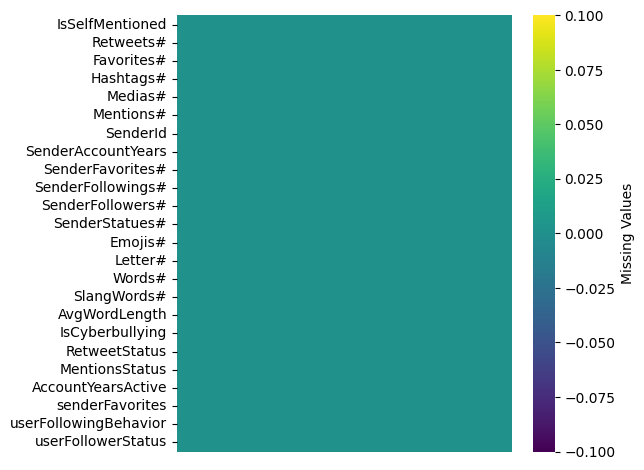



METHOD 2




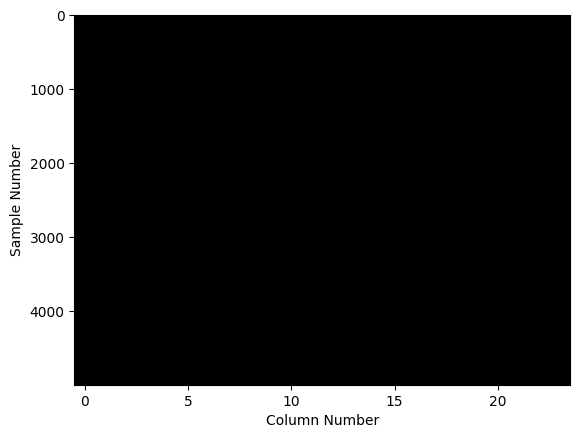

In [74]:
profiler.visualizeNull(data)

<Axes: title={'center': 'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

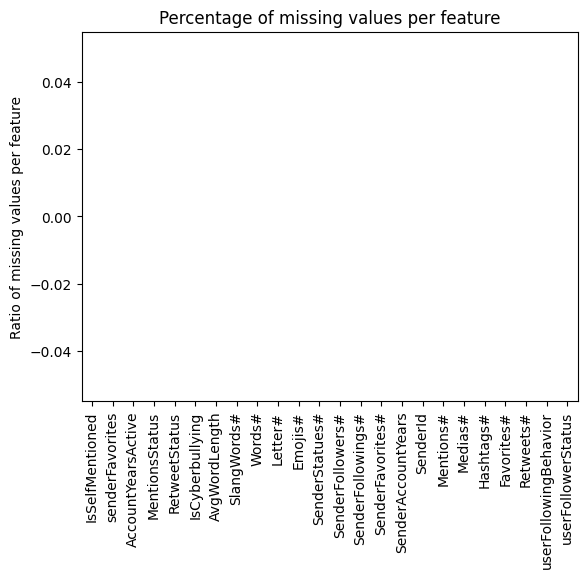

In [75]:
# method 3
data.isna().mean().sort_values().plot(kind="bar", title="Percentage of missing values per feature", ylabel="Ratio of missing values per feature")

<Axes: >

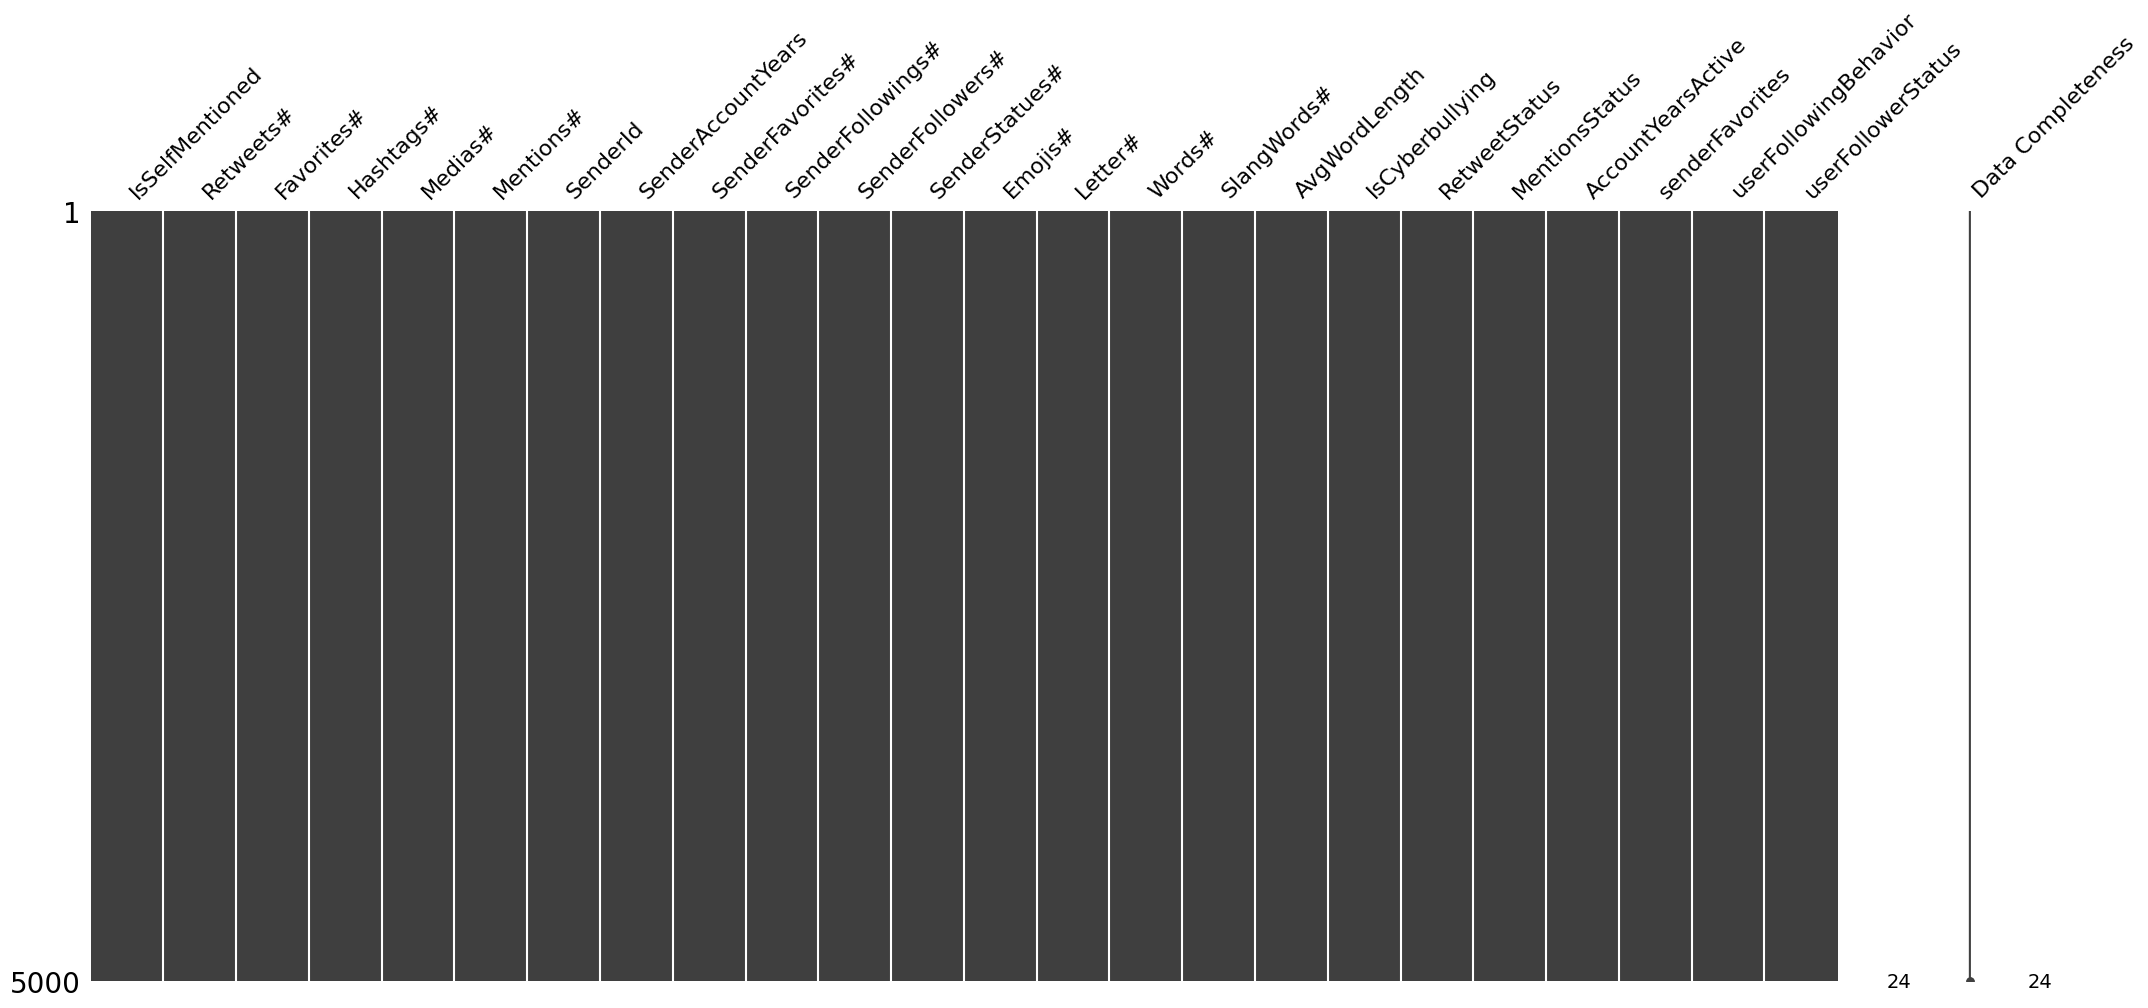

In [76]:
# method 4
msno.matrix(data, labels=True, sort="descending")

<Axes: >

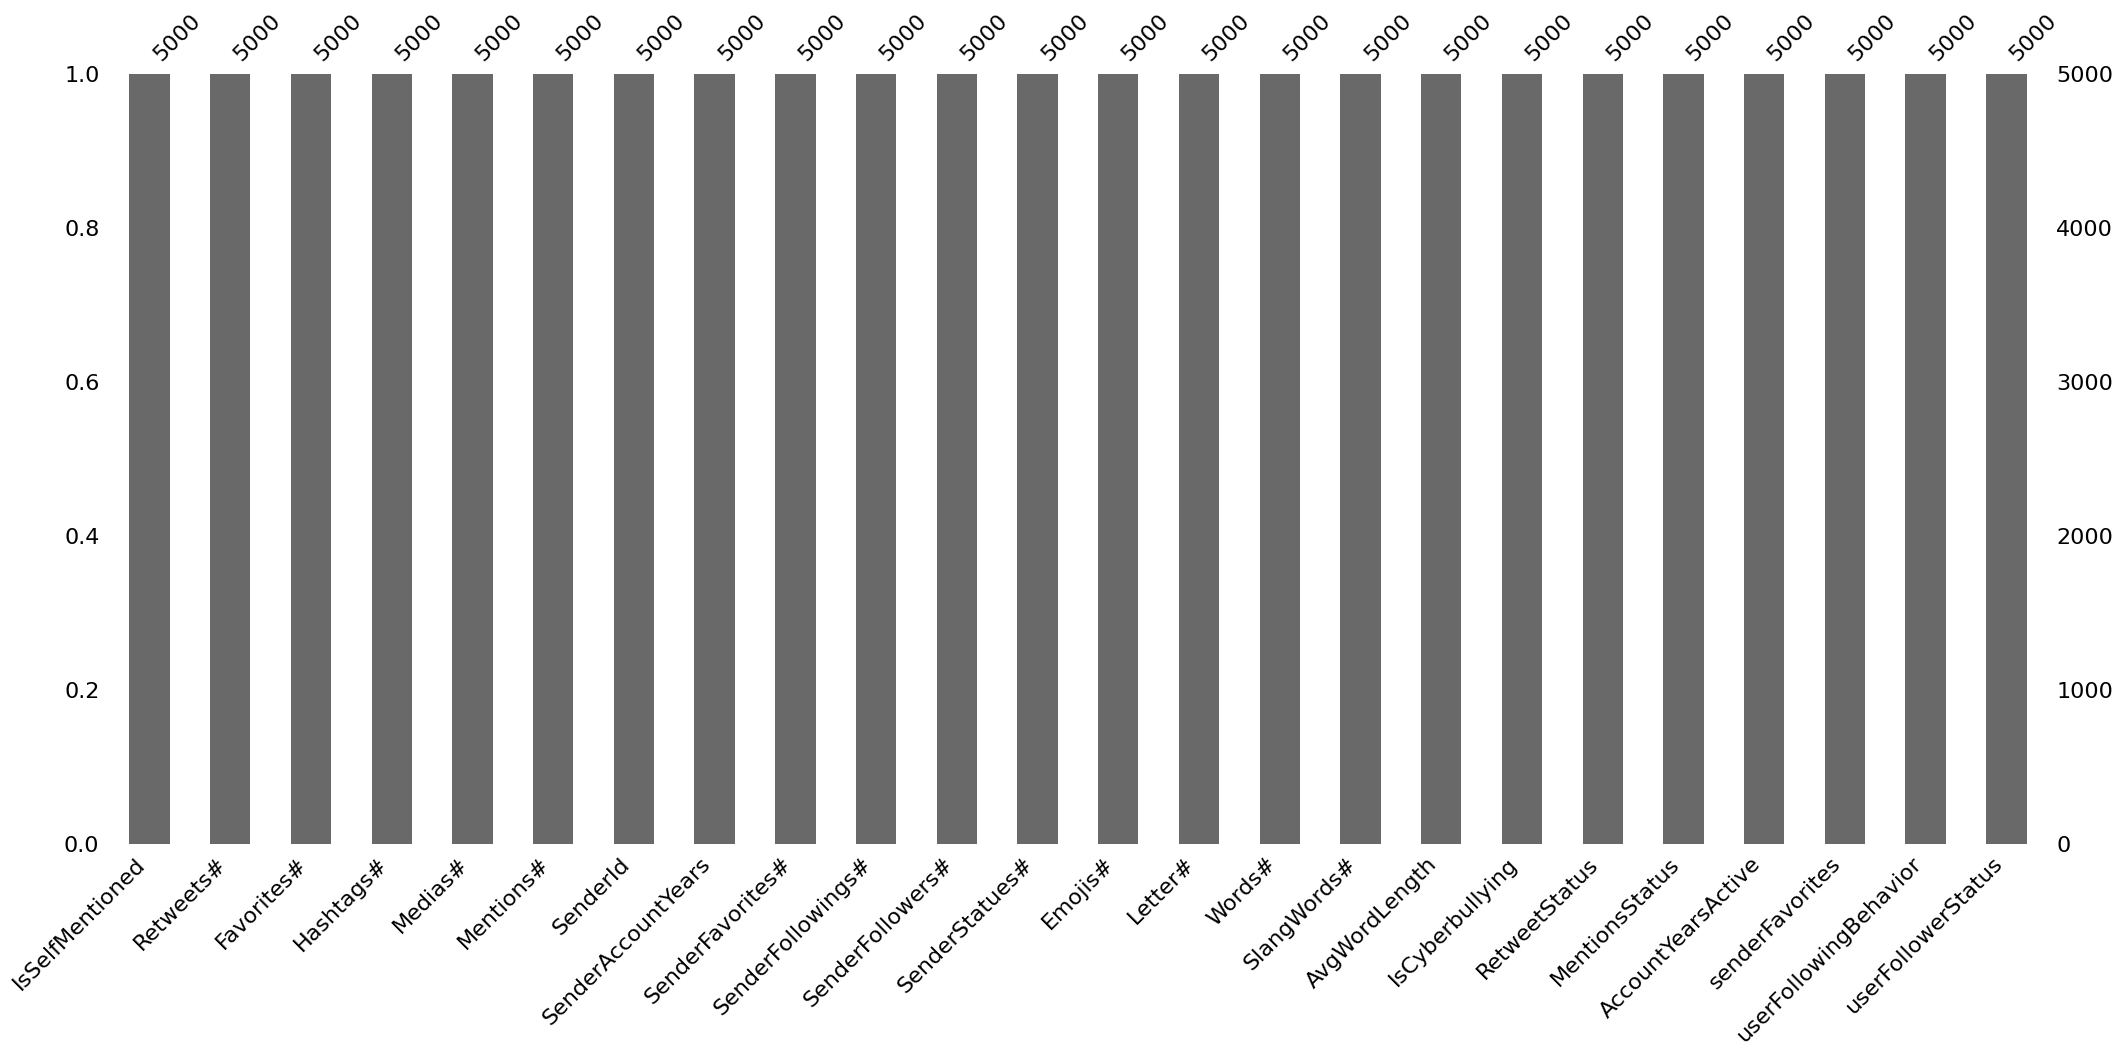

In [77]:
# method 5
msno.bar(data)

##### Data overview

In [78]:
data.describe(exclude="number")

,IsCyberbullying,RetweetStatus,MentionsStatus,AccountYearsActive,senderFavorites,userFollowingBehavior,userFollowerStatus
count,5000,5000,5000,5000,5000,5000,5000
unique,2,5,3,3,6,8,8
top,False,Low engagement,0-10 mentions,New Twitter user,Engaged user,Selective follower,Starting out
freq,2500,4516,4988,3184,1535,3153,2374


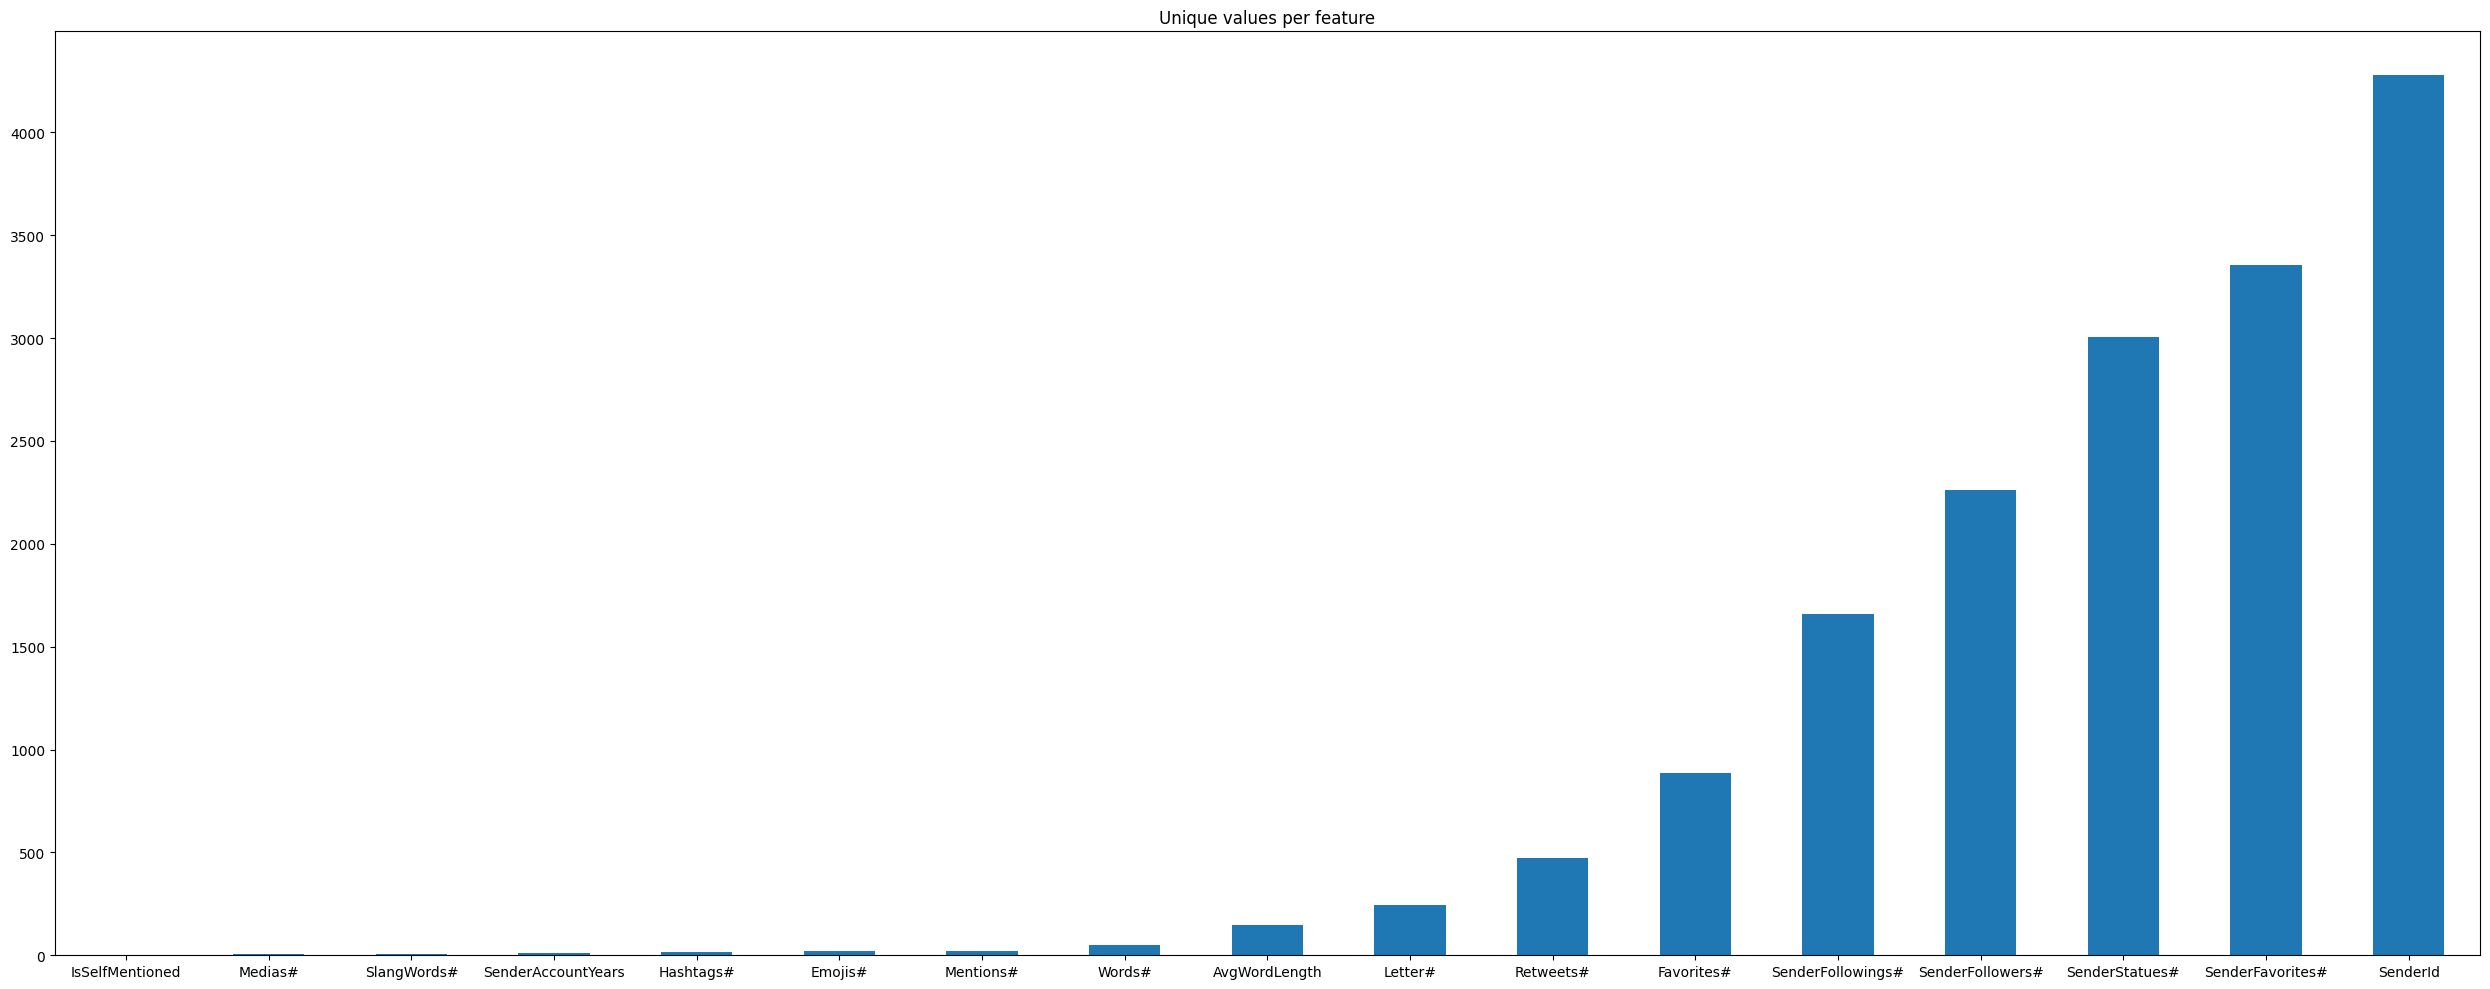

In [79]:
# for each numerical feature compute number of unique entries
unique_values = data.select_dtypes(include="number").nunique().sort_values()

# plot information with y-axis in log-scale
unique_values.plot.bar(logy=False, title="Unique values per feature", figsize=(25,10))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

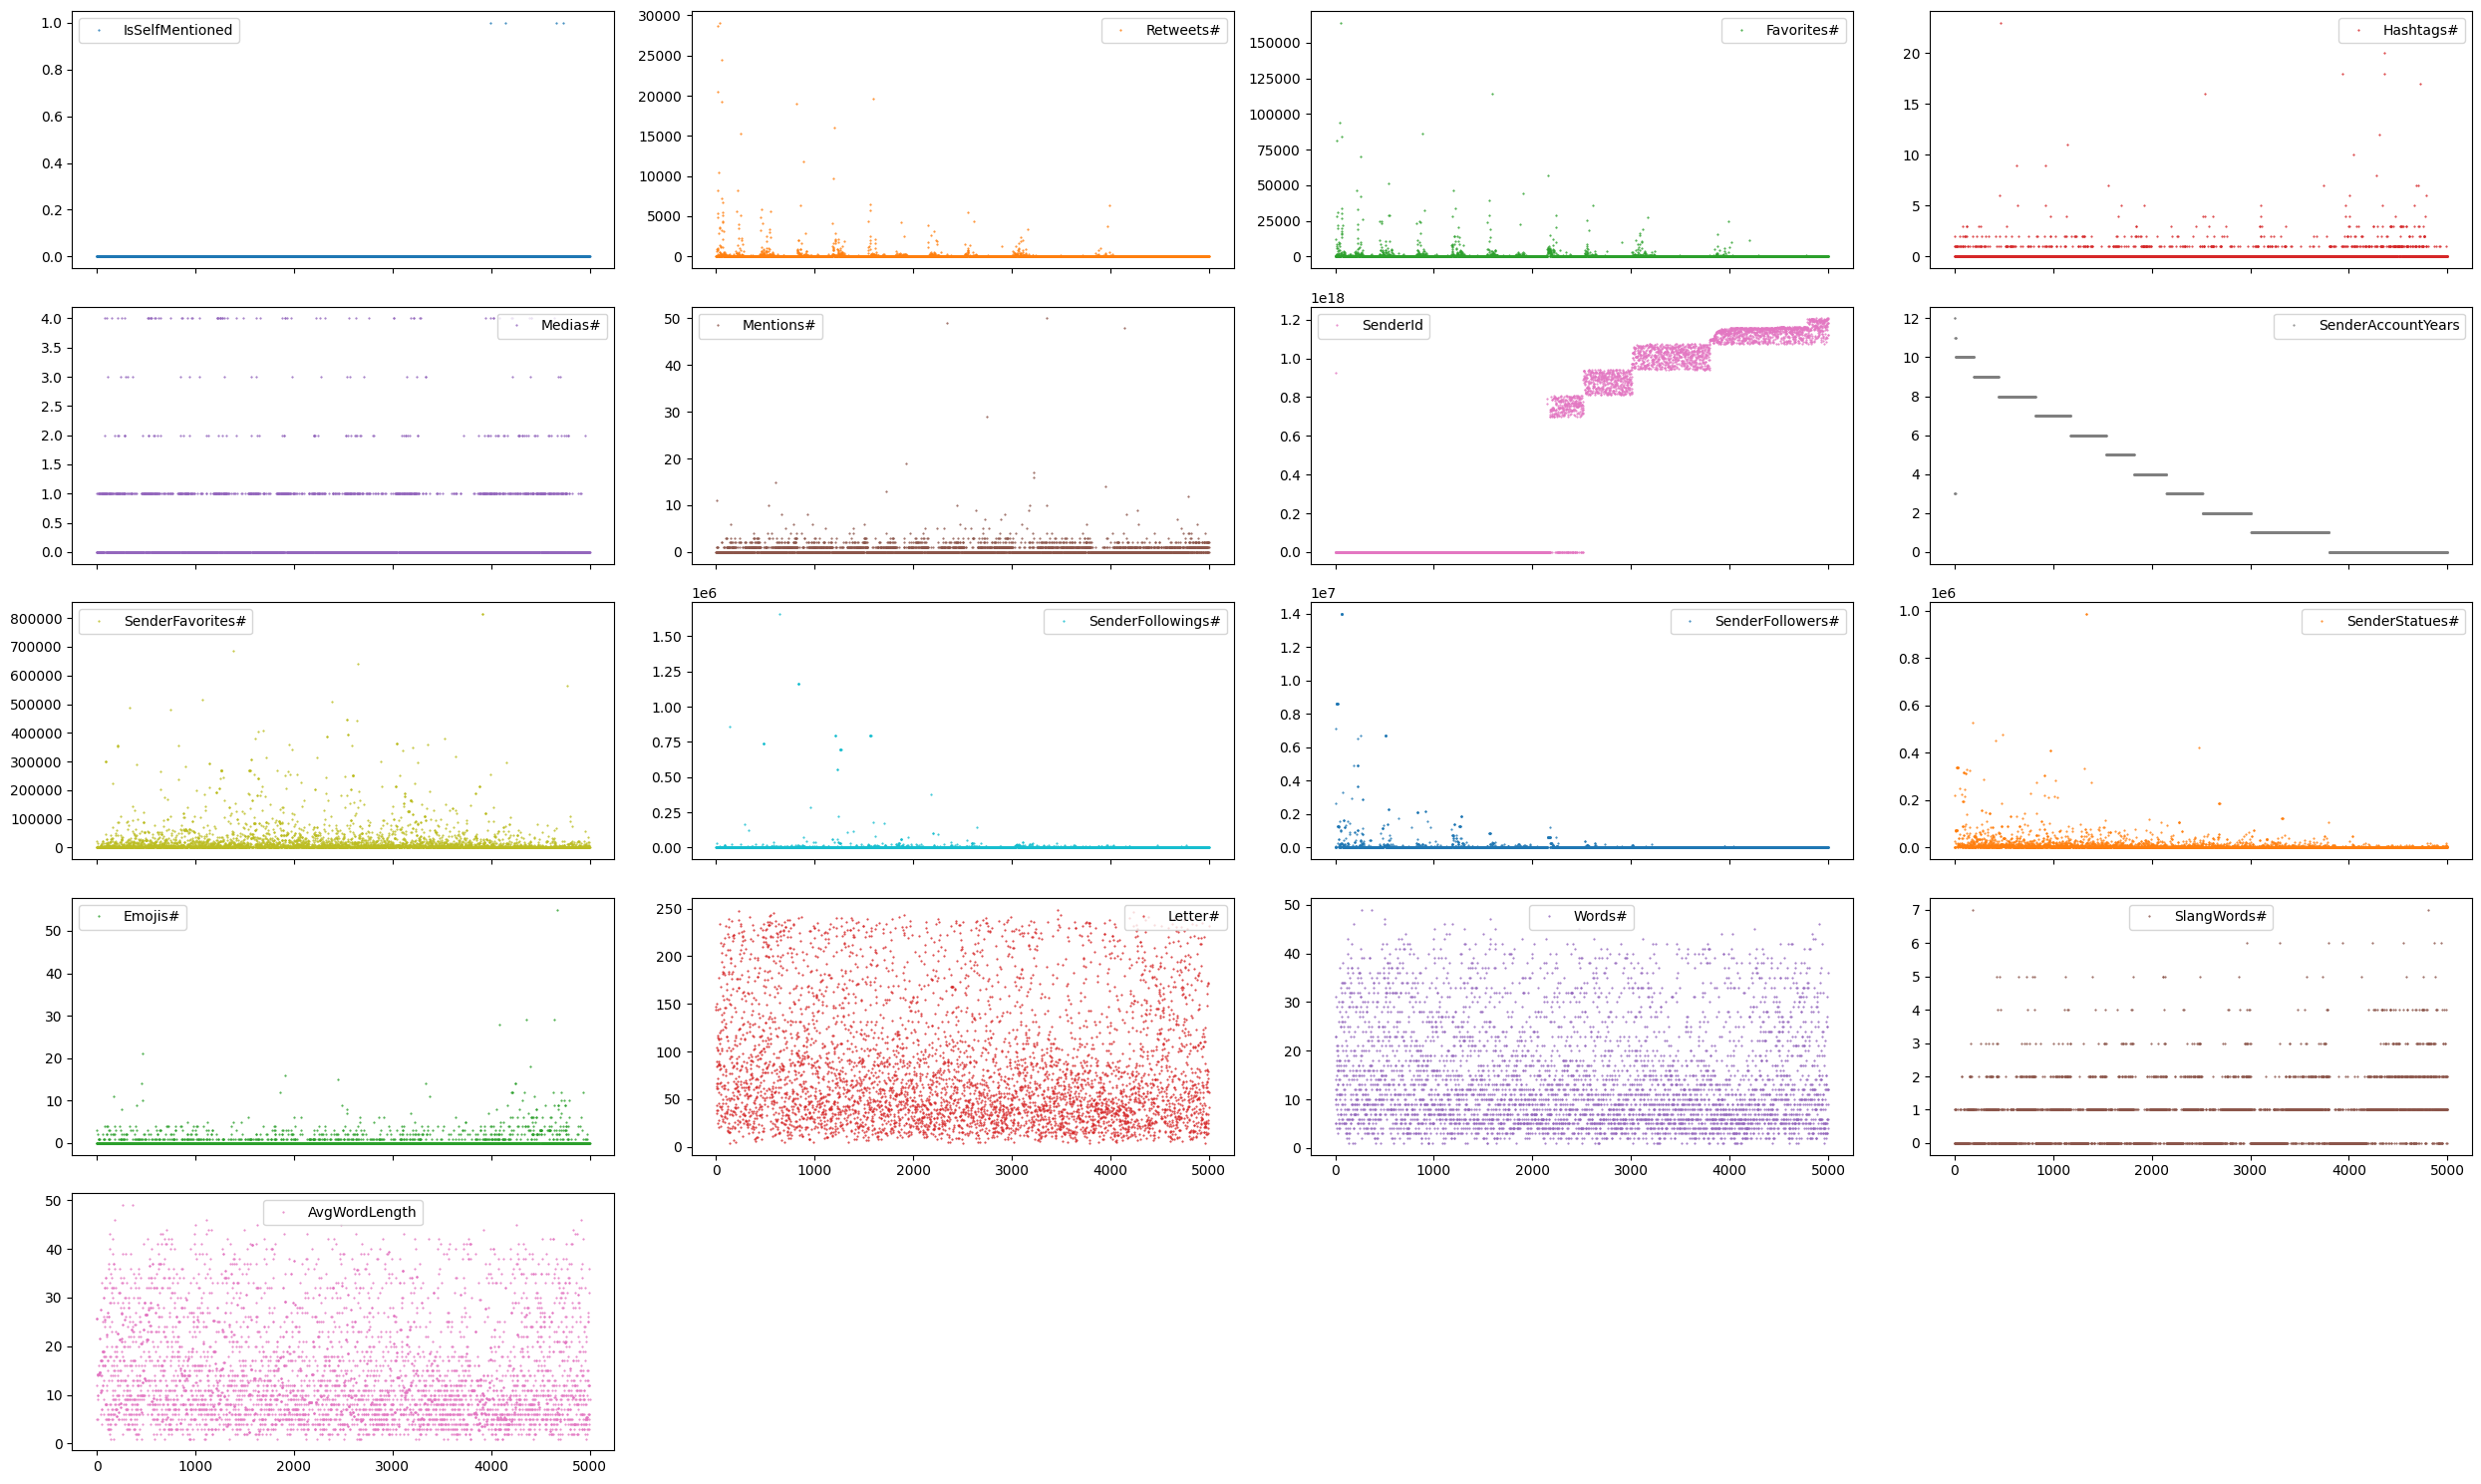

In [80]:
# data behavior per feature
data.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), markersize=1, figsize=(25, 15))
plt.tight_layout()
plt.show()

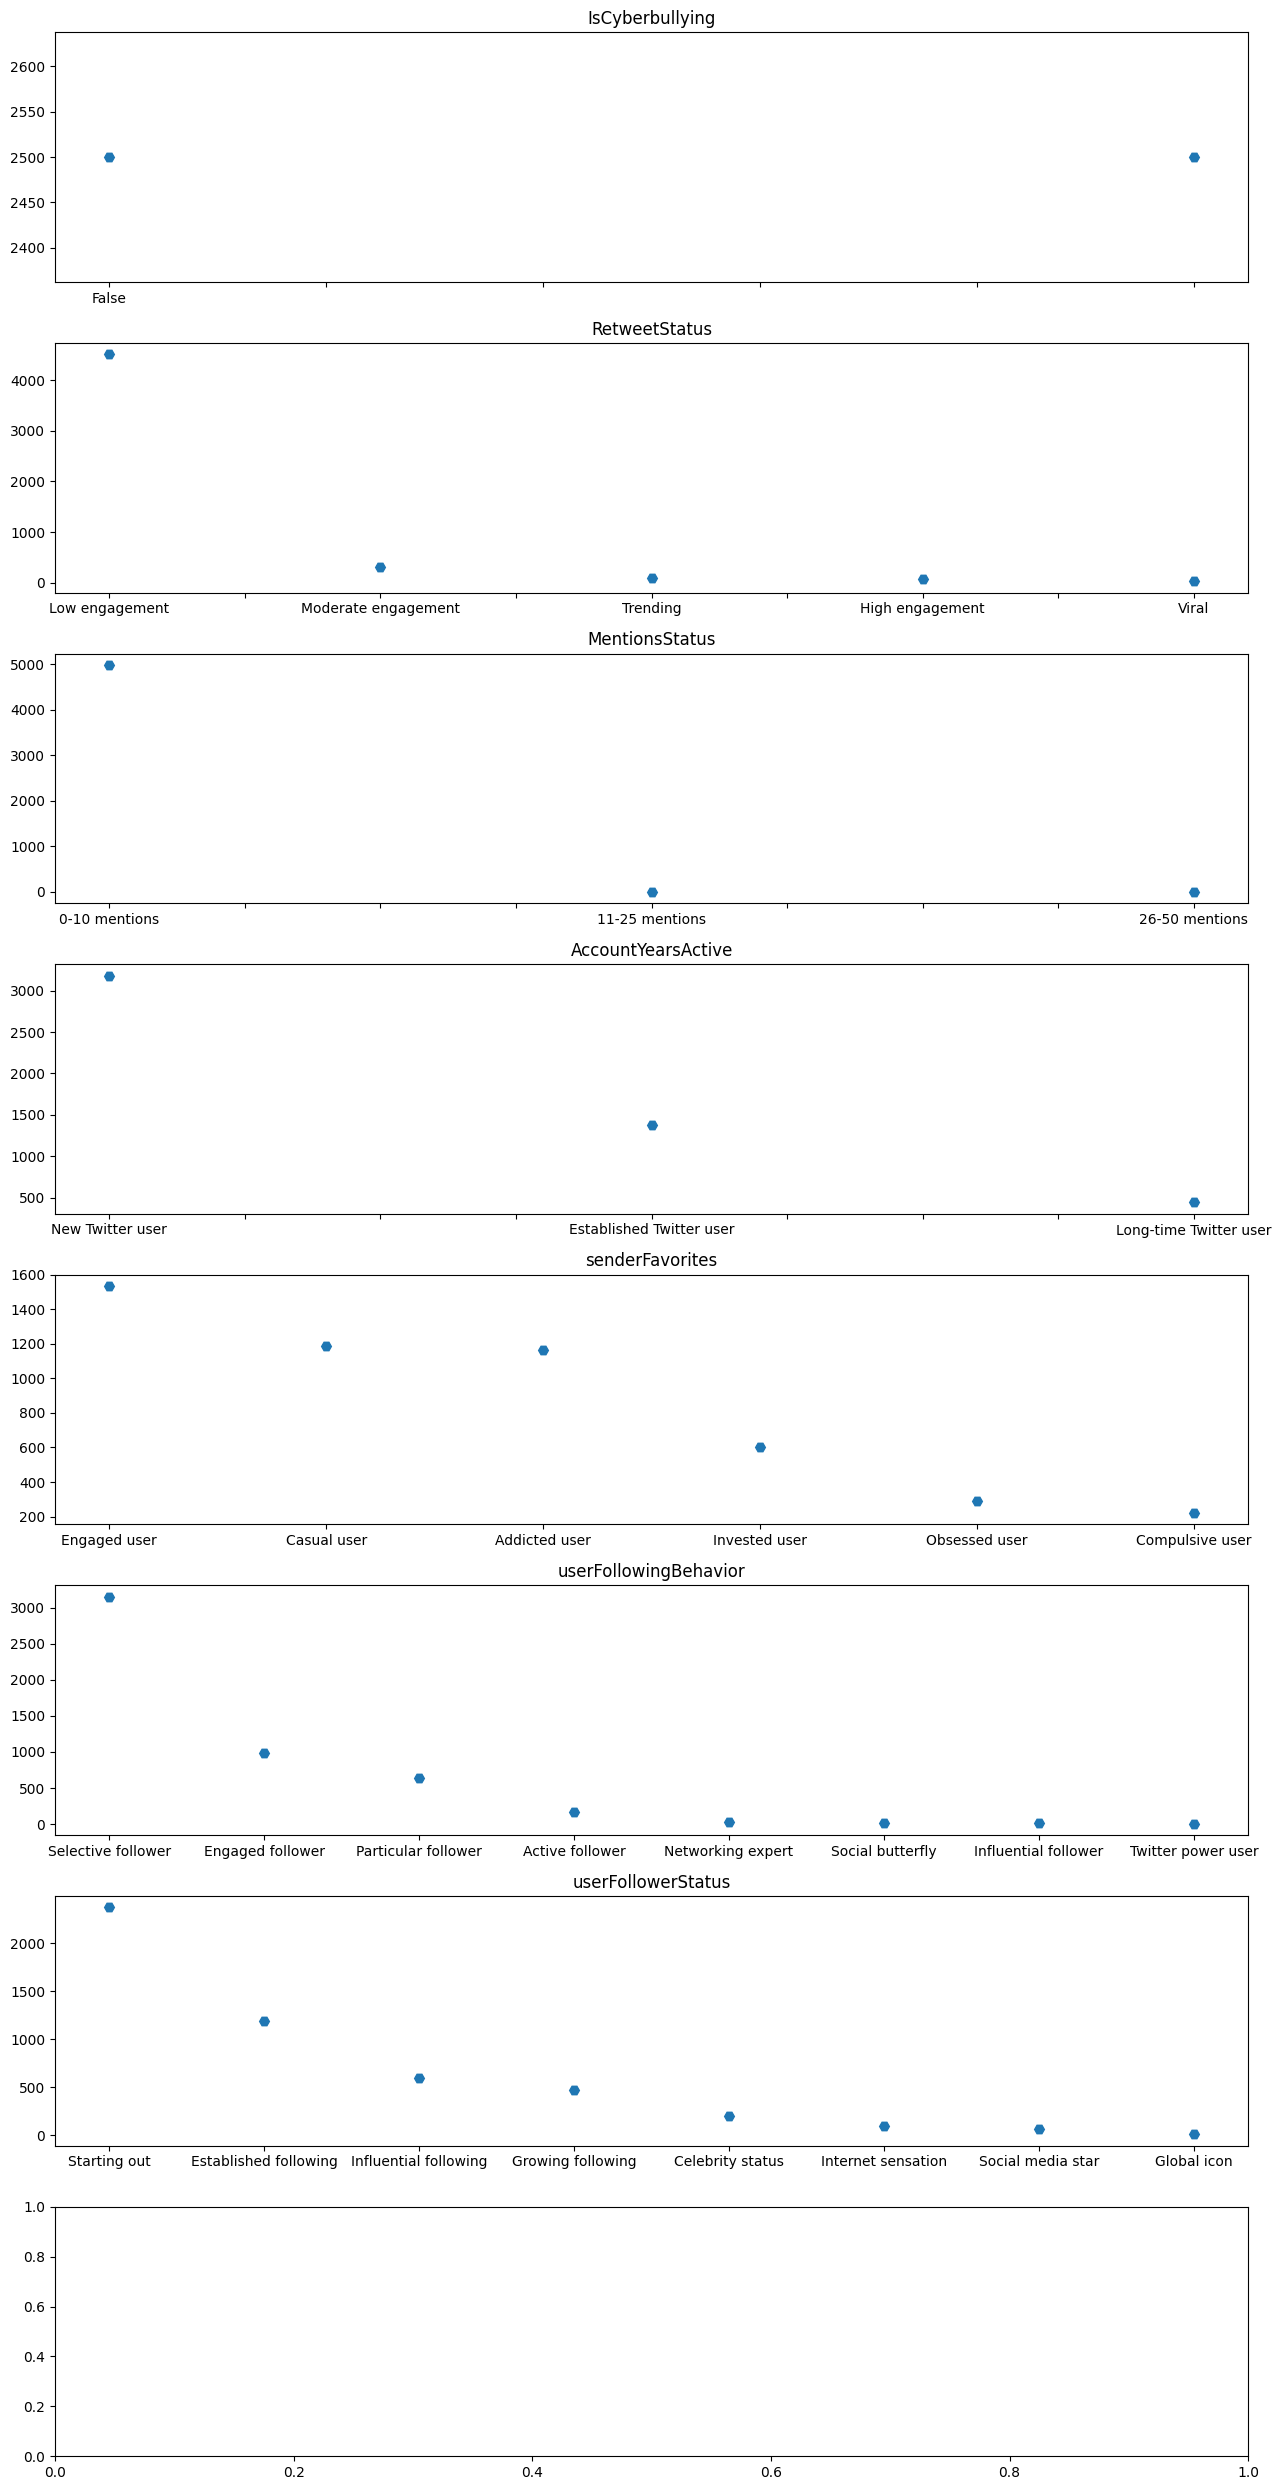

In [81]:
# create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=8, figsize=(13,25))

# identify non-numerical features
data_non_numerical = data.select_dtypes(exclude=["number", "datetime"])

# loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(data_non_numerical.columns, axes.ravel()):

    # selects one single feature and counts number of unique value
    data_non_numerical[col].value_counts().plot(

        # plots this information in a figure with log-scaled y-axis
        logy=False, title=col, lw=0, marker="H", markersize=7, ax=ax)
    
plt.tight_layout()
plt.show()

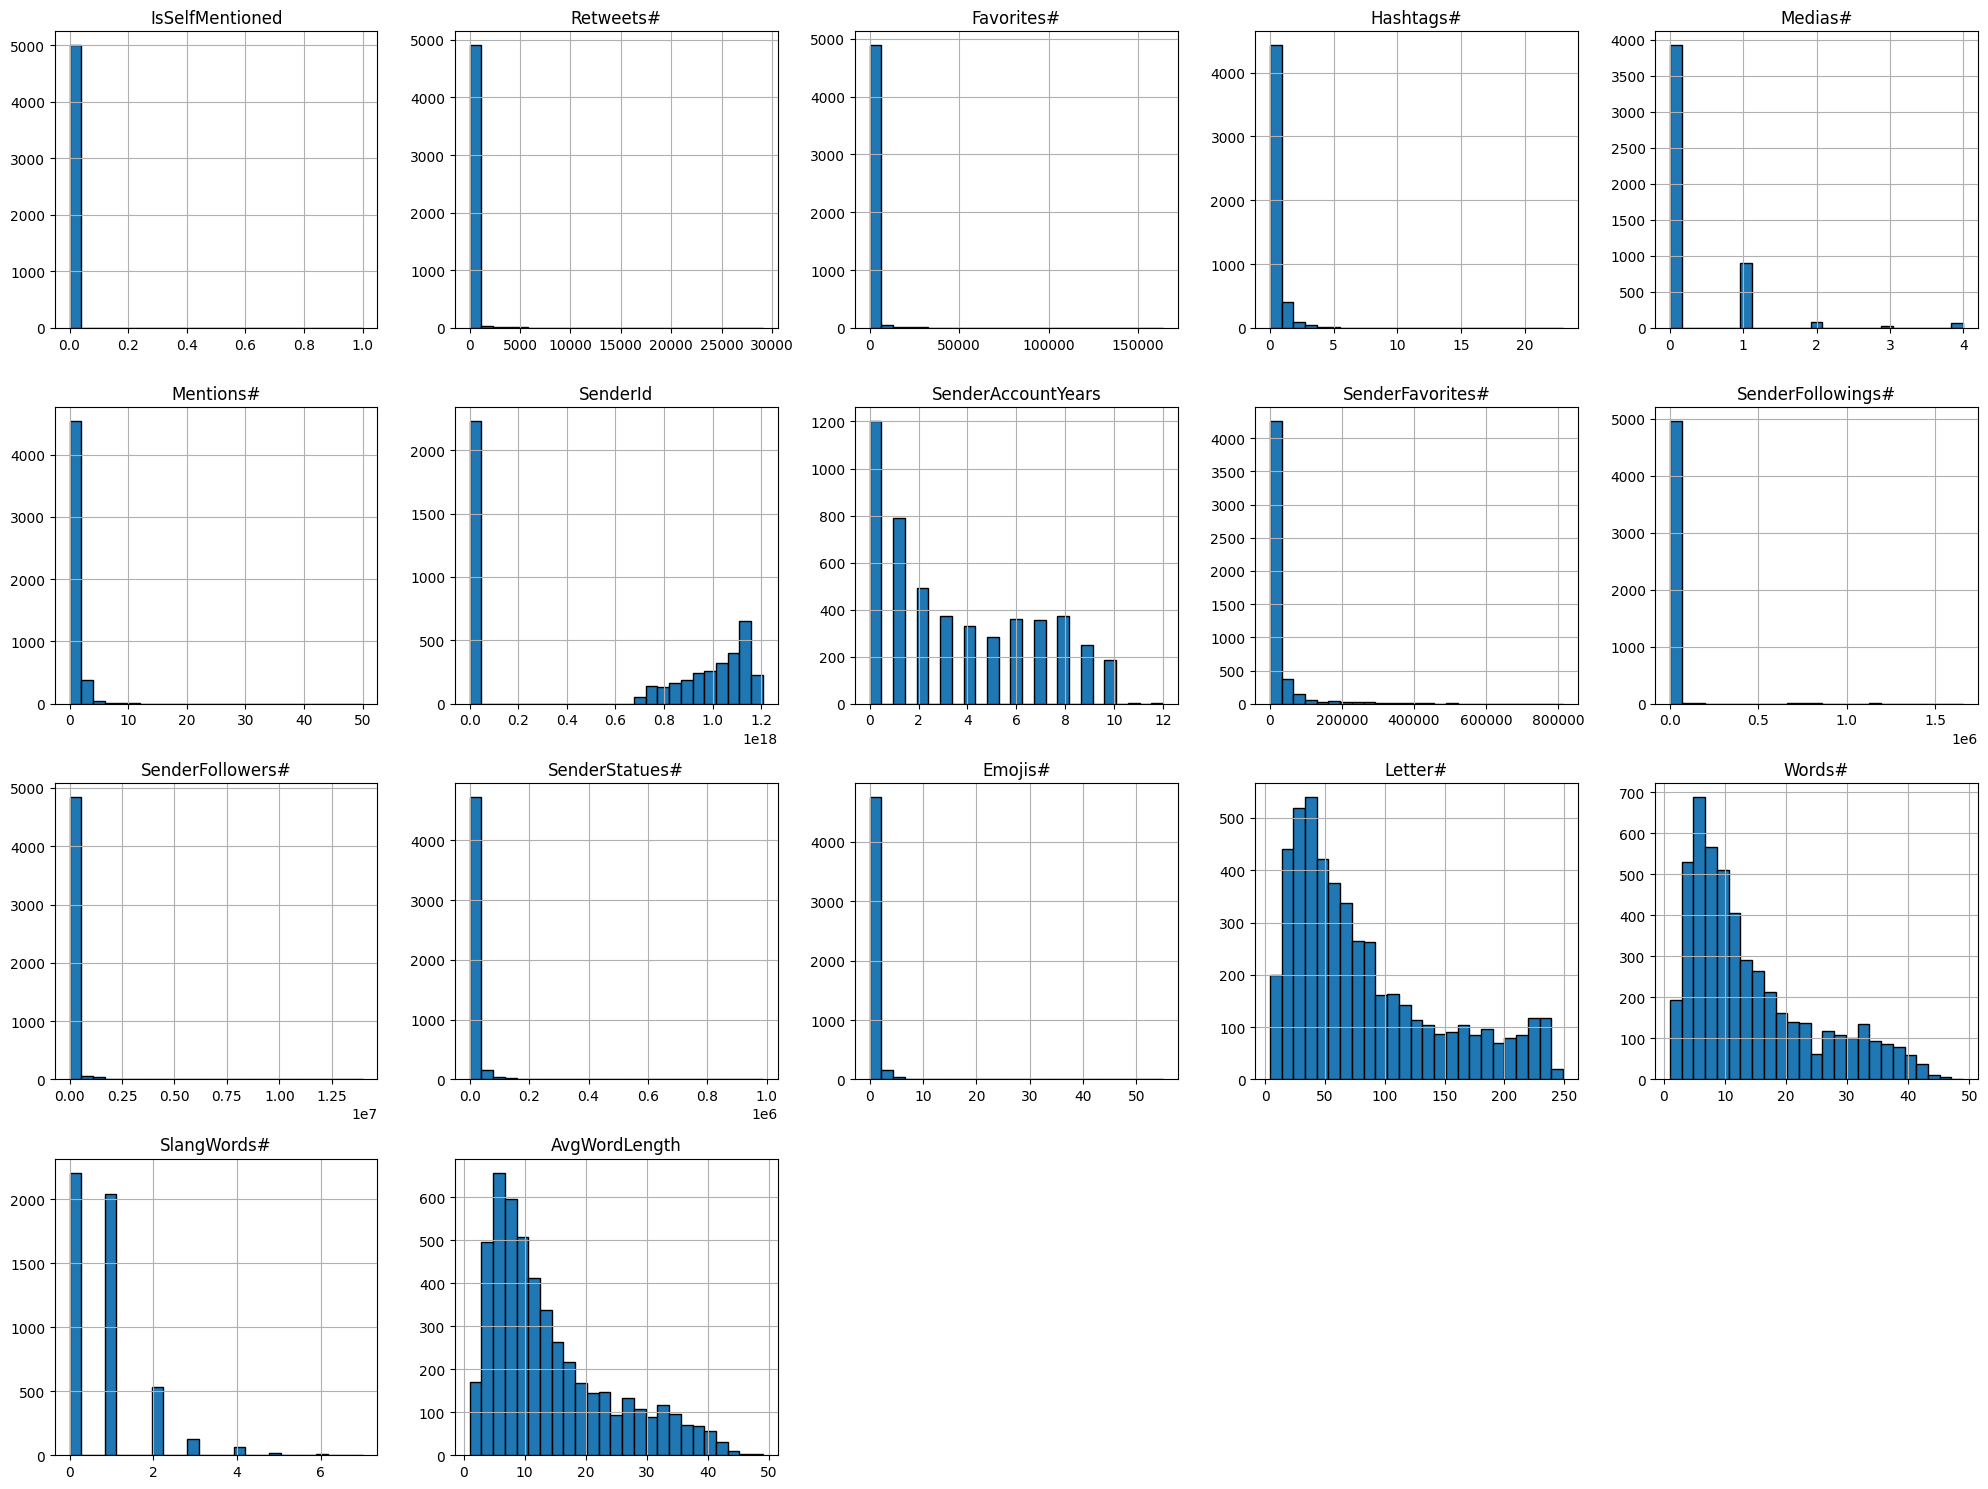

In [82]:
# plots the histogram for each numerical feature in a separate subplot
data.hist(bins=25, layout=(-1, 5), edgecolor="black", figsize=(20,15))
plt.tight_layout()
plt.show()

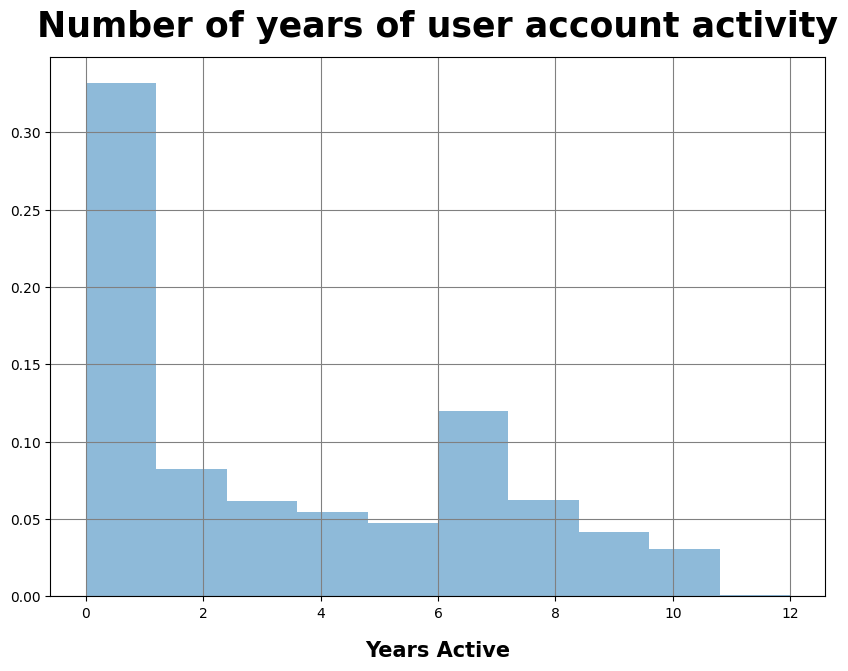

In [83]:
plt.figure(figsize=(10,7))

# histogram
data["SenderAccountYears"].hist(density=True, alpha=0.5)

# settings
plt.xlabel("Years Active", fontsize=15, fontweight="bold", labelpad=15)
plt.title("Number of years of user account activity", fontsize=25, fontweight="bold", pad=15)
plt.grid(color="gray")

# plt.savefig("/content/drive/MyDrive/")
plt.show()

There are {5000} Twitter users in total


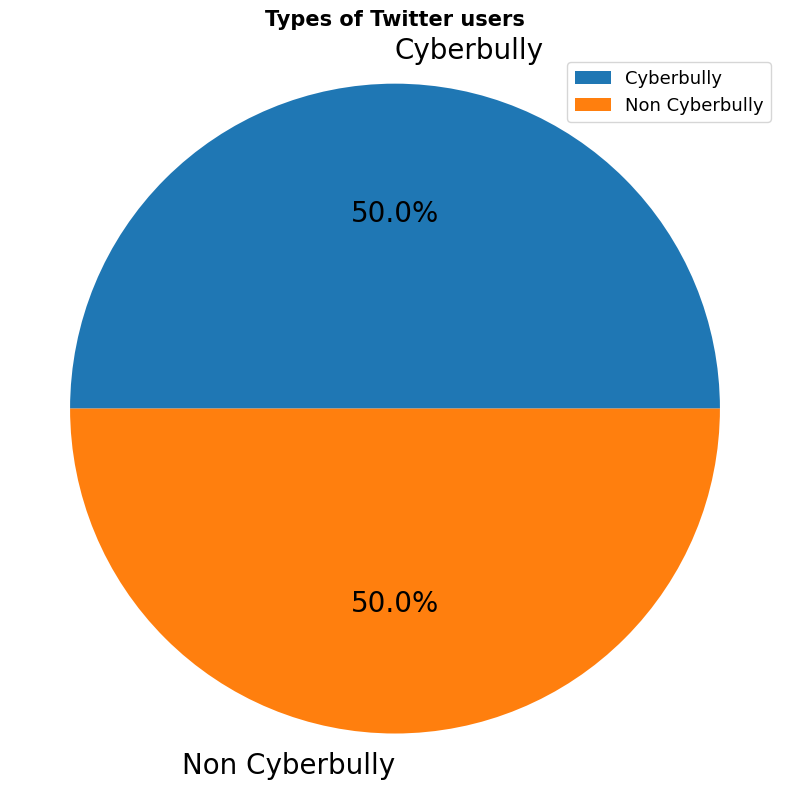

In [84]:
print("There are", {len(data["IsCyberbullying"])}, "Twitter users in total")

plt.figure(figsize=(8,8))

labels = ["Cyberbully", "Non Cyberbully"]
# color = ["dimgray","gold"]
sizes = data["IsCyberbullying"].value_counts(normalize=True)
plt.pie(sizes, labels=labels, startangle=0, autopct="%1.1f%%", textprops={"fontsize": 20}, radius=2)

plt.title("Types of Twitter users", fontsize=15, fontweight="bold", pad=20)
plt.axis("equal")
plt.legend(fontsize=13, loc=1)
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/")
plt.show()

There are {5000} Twitter users in total


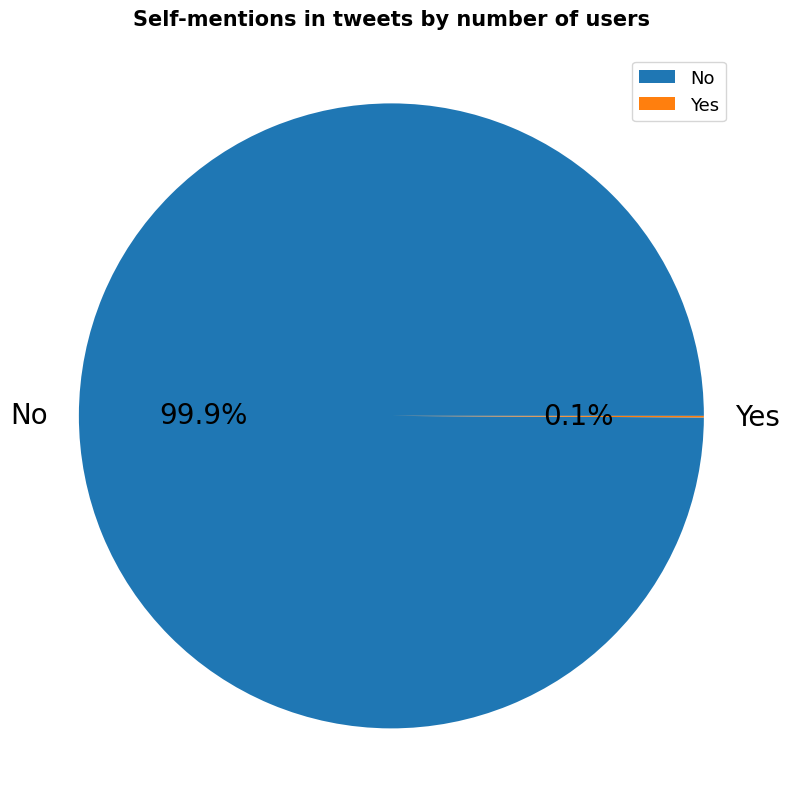

In [85]:
print("There are", {len(data["IsSelfMentioned"])}, "Twitter users in total")

plt.figure(figsize=(8,8))

labels = ["No", "Yes"]
# color = ["dimgray","gold"]
sizes = data["IsSelfMentioned"].value_counts(normalize=True)
plt.pie(sizes, labels=labels, startangle=0, autopct="%1.1f%%", textprops={"fontsize": 20}, radius=2)

plt.title("Self-mentions in tweets by number of users", fontsize=15, fontweight="bold", pad=20)
plt.axis("equal")
plt.legend(fontsize=13, loc=1)
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/")
plt.show()

There are {5000} Twitter users in total


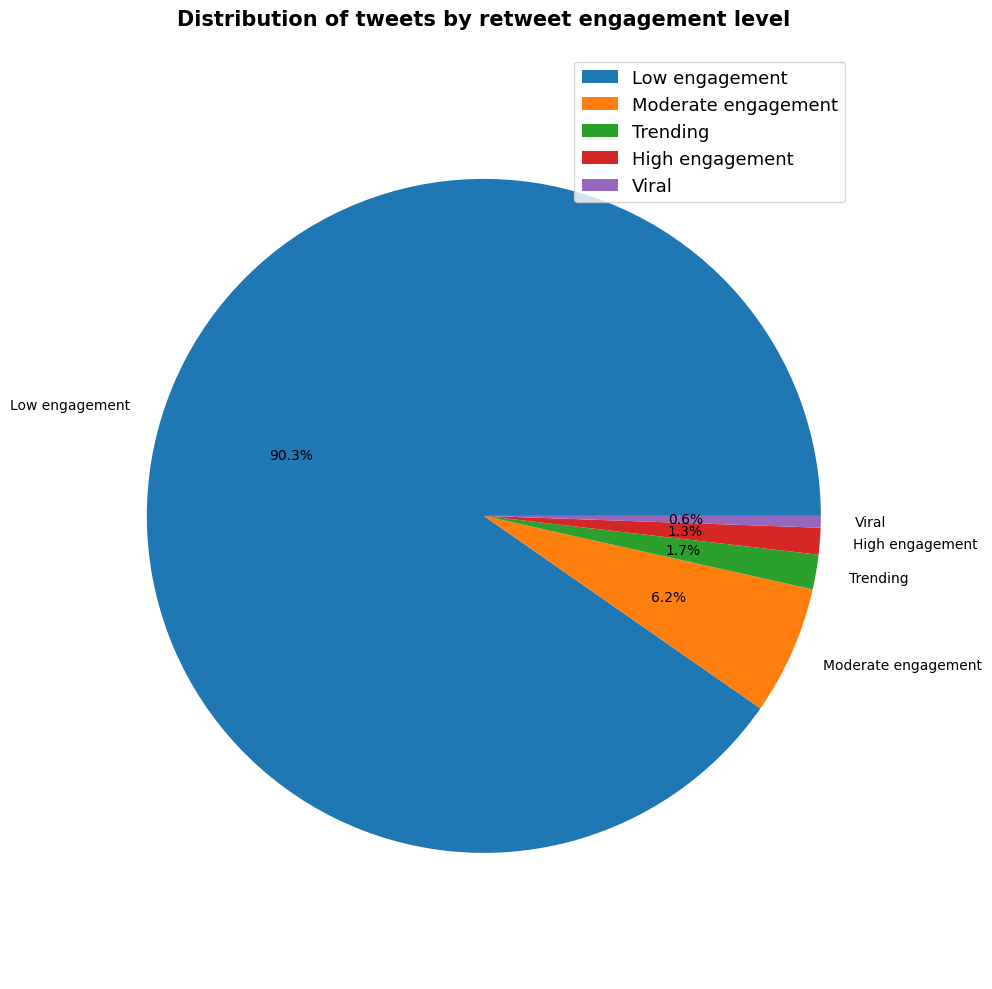

In [86]:
print("There are", {len(data["RetweetStatus"])}, "Twitter users in total")

plt.figure(figsize=(10,10))

labels = ["Low engagement", "Moderate engagement", "Trending", "High engagement", "Viral"]
# color = ["dimgray","gold"]
sizes = data["RetweetStatus"].value_counts(normalize=True)
plt.pie(sizes, labels=labels, startangle=0, autopct="%1.1f%%", textprops={"fontsize": 10}, radius=2)

plt.title("Distribution of tweets by retweet engagement level", fontsize=15, fontweight="bold", pad=20)
plt.axis("equal")
plt.legend(fontsize=13, loc=1)
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/")
plt.show()

In [87]:
data["RetweetStatus"].value_counts(normalize=True)

Low engagement        0.90
Moderate engagement   0.06
Trending              0.02
High engagement       0.01
Viral                 0.01
Name: RetweetStatus, dtype: float64

In [88]:
userProfile = data[['SenderId', 'IsCyberbullying', 'RetweetStatus', 'MentionsStatus', 'AccountYearsActive', 'senderFavorites', 'userFollowingBehavior', 'userFollowerStatus']]
userProfile

,SenderId,IsCyberbullying,RetweetStatus,MentionsStatus,AccountYearsActive,senderFavorites,userFollowingBehavior,userFollowerStatus
0,1935601099,False,Low engagement,0-10 mentions,New Twitter user,Casual user,Selective follower,Starting out
1,1935601099,False,Low engagement,0-10 mentions,New Twitter user,Casual user,Selective follower,Starting out
2,1935601099,False,Low engagement,0-10 mentions,New Twitter user,Casual user,Selective follower,Starting out
3,927613872390975488,False,Low engagement,11-25 mentions,New Twitter user,Casual user,Selective follower,Starting out
4,4495931,False,High engagement,0-10 mentions,Long-time Twitter user,Addicted user,Active follower,Influential following
...,...,...,...,...,...,...,...,...
4995,1121491581595467776,True,Low engagement,0-10 mentions,New Twitter user,Addicted user,Selective follower,Starting out
4996,1183449508409155584,True,Low engagement,0-10 mentions,New Twitter user,Invested user,Selective follower,Starting out
4997,1201558539472379904,True,Low engagement,0-10 mentions,New Twitter user,Casual user,Selective follower,Starting out
4998,1207067359342710784,True,Low engagement,0-10 mentions,New Twitter user,Casual user,Selective follower,Starting out
